In [1]:
import xarray as xr
import rioxarray as rxr

import netCDF4 as nc

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature

import geopandas as gpd

import seaborn as sns
import calendar

from matplotlib.ticker import FuncFormatter

from scipy.stats import linregress

/home/krish/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:

CG_FLASHES_THOMPSON = xr.open_dataset(r"/home/krish/Documents/rinu_files/DATASETS/WRF_MODEL_DATASETS/KERALA_23MARCH_2022_THOMPSON/CG_FLASHES_THOMPSON_23MARCH2022.nc")

# Convert time coordinate from UTC to IST
ist_time = CG_FLASHES_THOMPSON['time'] + pd.Timedelta(hours=5, minutes=30)

# Replace the existing time coordinate with the new IST time
CG_FLASHES_THOMPSON['time'] = ist_time

CG_FLASHES_THOMPSON = CG_FLASHES_THOMPSON.rename({'fls': 'cg'})

CG_FLASHES_THOMPSON

<xarray.Dataset>
Dimensions:  (lon: 204, lat: 204, time: 97)
Coordinates:
  * lon      (lon) float64 73.76 73.78 73.81 73.84 ... 79.24 79.27 79.3 79.33
  * lat      (lat) float64 7.995 8.022 8.049 8.076 ... 13.39 13.41 13.44 13.47
  * time     (time) datetime64[ns] 2022-03-22T17:30:00 ... 2022-03-24T17:30:00
Data variables:
    cg       (time, lat, lon) float64 ...

In [3]:
CG_FLASHES_MORRISON = xr.open_dataset(r"/home/krish/Documents/rinu_files/DATASETS/WRF_MODEL_DATASETS/KERALA_23MARCH_2022_MORRISON/CG_FLASHES_MORRISON_KERALA_23MARCH2022.nc")

# Convert time coordinate from UTC to IST
ist_time = CG_FLASHES_MORRISON['time'] + pd.Timedelta(hours=5, minutes=30)

# Replace the existing time coordinate with the new IST time
CG_FLASHES_MORRISON['time'] = ist_time

CG_FLASHES_MORRISON

<xarray.Dataset>
Dimensions:  (lon: 204, lat: 204, time: 97)
Coordinates:
  * lon      (lon) float64 73.76 73.78 73.81 73.84 ... 79.24 79.27 79.3 79.33
  * lat      (lat) float64 7.995 8.022 8.049 8.076 ... 13.39 13.41 13.44 13.47
  * time     (time) datetime64[ns] 2022-03-22T17:30:00 ... 2022-03-24T17:30:00
Data variables:
    cg       (time, lat, lon) float64 ...

In [4]:
CG_FLASHES_WDM6 = xr.open_dataset(r"/home/krish/Documents/rinu_files/DATASETS/WRF_MODEL_DATASETS/KERALA_23MARCH_2022_WDM6/CG_FLASHES_WDM6_KERALA_23MARCH2022.nc")

# Convert time coordinate from UTC to IST
ist_time = CG_FLASHES_WDM6['time'] + pd.Timedelta(hours=5, minutes=30)

# Replace the existing time coordinate with the new IST time
CG_FLASHES_WDM6['time'] = ist_time

CG_FLASHES_WDM6

<xarray.Dataset>
Dimensions:  (lon: 204, lat: 204, time: 97)
Coordinates:
  * lon      (lon) float64 73.76 73.78 73.81 73.84 ... 79.24 79.27 79.3 79.33
  * lat      (lat) float64 7.995 8.022 8.049 8.076 ... 13.39 13.41 13.44 13.47
  * time     (time) datetime64[ns] 2022-03-22T17:30:00 ... 2022-03-24T17:30:00
Data variables:
    cg       (time, lat, lon) float64 ...

In [8]:
FLASHES_LLN = pd.read_csv('/home/krish/Documents/rinu_files/DATASETS/FINAL_LLN_DATA/LLN_INDIA_IST_IC_CG_2019_2023.csv')

In [9]:
FLASHES_LLN

LightningTimeString  Latitude  Longitude  StrokeType
0         2019-01-01 05:30:39.263121902  16.90353   75.02185           1
1         2019-01-01 05:30:52.165577769  16.95177   75.38243           1
2         2019-01-01 05:30:53.585744857  16.98285   75.09487           1
3         2019-01-01 05:30:59.806125581  16.98081   75.15514           1
4         2019-01-01 05:31:11.456015169  16.40237   81.41506           1
...                                 ...       ...        ...         ...
77800679  2023-12-31 23:12:37.524864673   9.41870   76.39504           0
77800680  2023-12-31 23:12:37.764745473   9.44879   76.38204           0
77800681  2023-12-31 23:13:34.855970740   9.41363   76.38728           0
77800682  2023-12-31 23:36:20.676721572   9.73220   76.34044           1
77800683  2023-12-31 23:47:37.446437716  10.29008   76.42598           0

[77800684 rows x 4 columns]

In [10]:
CG_FLASHES_LLN = FLASHES_LLN[FLASHES_LLN['StrokeType'] == 0]

CG_FLASHES_LLN

LightningTimeString  Latitude  Longitude  StrokeType
16        2019-01-01 05:33:18.084866464  19.14665   78.68289           0
41        2019-01-01 05:38:50.297981619  23.68459   79.52453           0
56        2019-01-01 05:43:38.454038918  23.92132   78.69862           0
57        2019-01-01 05:43:47.057644069  24.04799   79.10343           0
60        2019-01-01 06:02:03.718367755  11.03896   76.73711           0
...                                 ...       ...        ...         ...
77800677  2023-12-31 23:09:30.213826537   9.67373   76.47507           0
77800679  2023-12-31 23:12:37.524864673   9.41870   76.39504           0
77800680  2023-12-31 23:12:37.764745473   9.44879   76.38204           0
77800681  2023-12-31 23:13:34.855970740   9.41363   76.38728           0
77800683  2023-12-31 23:47:37.446437716  10.29008   76.42598           0

[28590709 rows x 4 columns]

In [11]:
CG_FLASHES_LLN['LightningTimeString'] = pd.to_datetime(CG_FLASHES_LLN['LightningTimeString'], format = '%Y-%m-%d %H:%M:%S.%f')

/tmp/ipykernel_10882/4164989490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CG_FLASHES_LLN['LightningTimeString'] = pd.to_datetime(CG_FLASHES_LLN['LightningTimeString'], format = '%Y-%m-%d %H:%M:%S.%f')


In [12]:
CG_FLASHES_LLN['StrokeType'] = 1 

/tmp/ipykernel_10882/2598503860.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CG_FLASHES_LLN['StrokeType'] = 1


In [13]:
MARCH_2022 = CG_FLASHES_LLN[(CG_FLASHES_LLN['LightningTimeString'].dt.year == 2022) & (CG_FLASHES_LLN['LightningTimeString'].dt.month == 3)]

KERALA_MARCH_2022 = MARCH_2022[(MARCH_2022['Latitude'] >= 8) & (MARCH_2022['Latitude'] <= 13) & (MARCH_2022['Longitude'] >= 74) & (MARCH_2022['Longitude'] <= 79)]

# Extract date from 'LightningTimeString' and create a new column 'Date'
KERALA_MARCH_2022['Date'] = KERALA_MARCH_2022['LightningTimeString'].dt.date

# Group by 'Date' and sum the 'StrokeType' values for each date
flash_counts_per_day = KERALA_MARCH_2022.groupby('Date')['StrokeType'].sum()

print("Flash counts for each day from MARCH 1st to MARCH 31st:")
print(flash_counts_per_day)

Flash counts for each day from MARCH 1st to MARCH 31st:
Date
2022-03-07      99
2022-03-08     257
2022-03-09     109
2022-03-15     309
2022-03-16    2094
2022-03-17      97
2022-03-18     794
2022-03-19     741
2022-03-20     729
2022-03-21     972
2022-03-22     191
2022-03-23    5485
2022-03-24    1739
2022-03-25     115
2022-03-26     831
2022-03-27    2673
2022-03-28    3206
2022-03-29     790
2022-03-30    5211
2022-03-31     242
Name: StrokeType, dtype: int64


/tmp/ipykernel_10882/3849175813.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KERALA_MARCH_2022['Date'] = KERALA_MARCH_2022['LightningTimeString'].dt.date


In [14]:
KERALA_MARCH_2022

LightningTimeString  Latitude  Longitude  StrokeType  \
46964929 2022-03-07 18:04:52.267126142   9.35756   77.03508           1   
46964969 2022-03-07 18:07:11.456537961   9.13587   77.11317           1   
46965048 2022-03-07 18:12:06.861126363   9.32044   77.10116           1   
46965331 2022-03-07 18:30:14.517202138   9.43649   77.15665           1   
46965364 2022-03-07 18:32:04.538769483   9.30760   77.08086           1   
...                                ...       ...        ...         ...   
47141285 2022-03-31 17:16:49.592640995  10.21844   76.54893           1   
47141288 2022-03-31 17:17:39.832213044  12.34931   77.61948           1   
47141291 2022-03-31 17:18:56.777242660  12.29542   77.60528           1   
47141293 2022-03-31 17:19:40.351565599  12.31957   77.60366           1   
47141302 2022-03-31 18:38:54.290730774  12.57853   77.44211           1   

                Date  
46964929  2022-03-07  
46964969  2022-03-07  
46965048  2022-03-07  
46965331  2022-03-07  
46965364  2022-03-07  
...              ...  
47141285  2022-03-31  
47141288  2022-03-31  
47141291  2022-03-31  
47141293  2022-03-31  
47141302  2022-03-31  

[26684 rows x 5 columns]

In [15]:
KERALA_MARCH_22_23_24_2022 = KERALA_MARCH_2022[(KERALA_MARCH_2022['LightningTimeString'].dt.year == 2022) & (KERALA_MARCH_2022['LightningTimeString'].dt.month == 3) 
                                               & ((KERALA_MARCH_2022['LightningTimeString'].dt.day >= 22) & (KERALA_MARCH_2022['LightningTimeString'].dt.day <= 24))]
start_time = pd.Timestamp('2022-03-22 17:30:00')
end_time = pd.Timestamp('2022-03-24 17:30:00')

# Filter data within the specified time range
selected_data = KERALA_MARCH_22_23_24_2022[(KERALA_MARCH_22_23_24_2022['LightningTimeString'] >= start_time) & (KERALA_MARCH_22_23_24_2022['LightningTimeString'] <= end_time)]
selected_data




LightningTimeString  Latitude  Longitude  StrokeType  \
47060302 2022-03-22 20:32:43.570550560   9.81955   77.54358           1   
47060303 2022-03-22 20:33:47.878616631   9.95558   77.44384           1   
47060304 2022-03-22 20:35:22.953445315   9.89753   77.48448           1   
47060307 2022-03-22 20:39:18.440023422  10.02611   77.52864           1   
47060310 2022-03-22 20:42:06.453096985   9.77538   77.40978           1   
...                                ...       ...        ...         ...   
47084695 2022-03-24 17:23:22.751956939   9.93580   76.48021           1   
47084734 2022-03-24 17:25:02.324088394  10.17236   76.56911           1   
47084781 2022-03-24 17:27:22.431107759   9.52875   77.77748           1   
47084793 2022-03-24 17:27:57.905896484   9.58886   77.75307           1   
47084818 2022-03-24 17:29:01.760064482   9.55700   77.76168           1   

                Date  
47060302  2022-03-22  
47060303  2022-03-22  
47060304  2022-03-22  
47060307  2022-03-22  
47060310  2022-03-22  
...              ...  
47084695  2022-03-24  
47084734  2022-03-24  
47084781  2022-03-24  
47084793  2022-03-24  
47084818  2022-03-24  

[6897 rows x 5 columns]

In [144]:
selected_data.to_csv('/home/krish/Documents/rinu_files/DATASETS/WRF_MODEL_DATASETS/KERALA_MARCH_22-23-24_2022.csv', index=False)

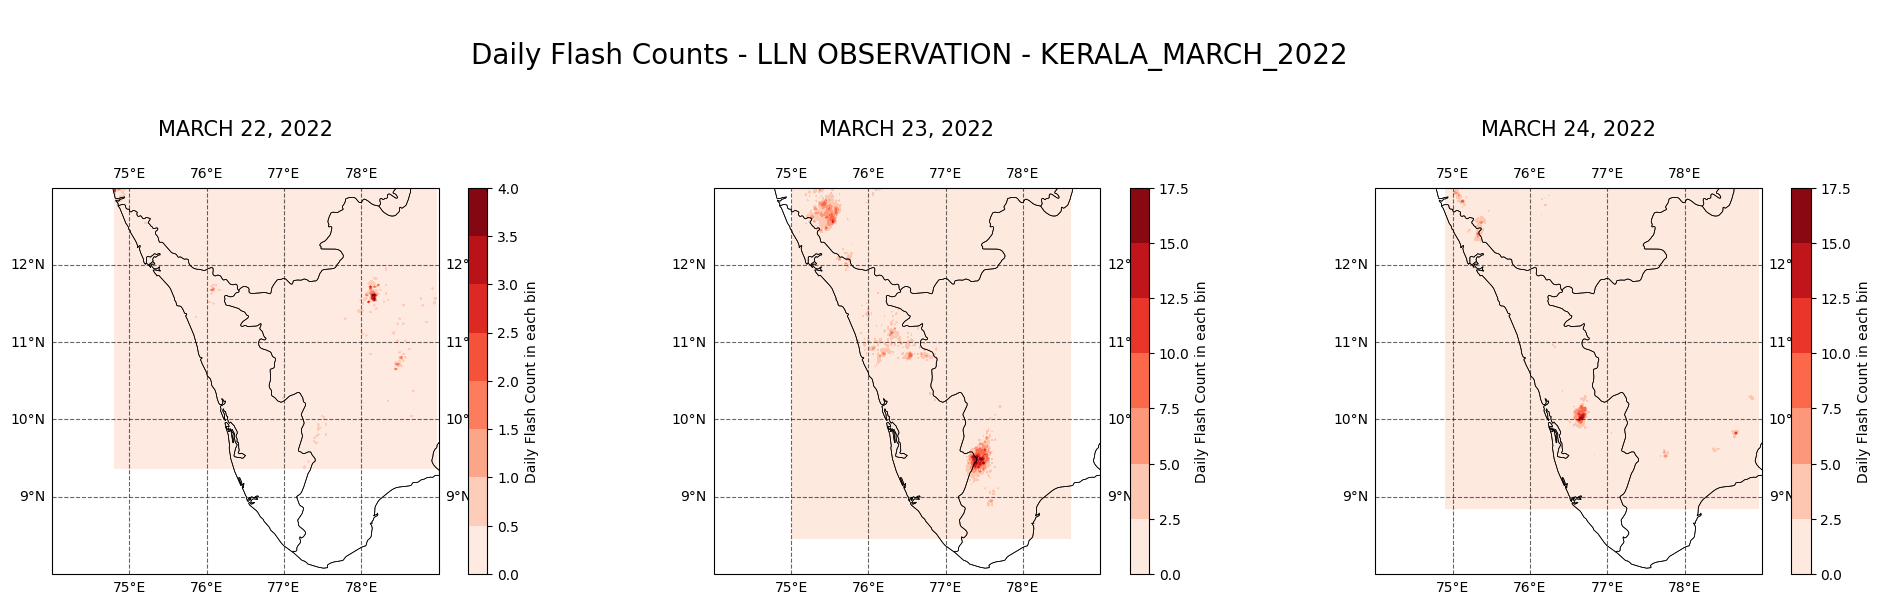

In [44]:

# Define the specific days to plot
days_to_plot = range(22, 25)

# Create subplots with larger figure size
fig, axes = plt.subplots(1, 3, figsize=(20, 6), subplot_kw={'projection': ccrs.PlateCarree()})

plt.suptitle('\nDaily Flash Counts - LLN OBSERVATION - KERALA_MARCH_2022\n', fontsize=20)

# Iterate over each day in April
for i, day in enumerate(days_to_plot):
    # Filter data for the current day
    data_daily = KERALA_MARCH_2022[KERALA_MARCH_2022['LightningTimeString'].dt.day == day]

    x = data_daily['Longitude']
    y = data_daily['Latitude']

    ax = axes[i]

    ax.set_extent([74, 79, 8, 13], crs=ccrs.PlateCarree())

    hist, xedges, yedges = np.histogram2d(x, y, bins=167, density=False)

    contours = ax.contourf(xedges[:-1], yedges[:-1], hist.T, cmap='Reds')
    cbar = plt.colorbar(contours, ax=ax, orientation='vertical', label='Daily Flash Count in each bin')

    ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5, edgecolor='gray')
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
    ax.add_feature(cfeature.STATES, linestyle='-', linewidth=0.5, edgecolor='black')

    ax.gridlines(draw_labels=True, color='black', alpha=0.6, linestyle='--')

    ax.set_title(f'\n\nMARCH {day}, 2022\n', fontsize=15)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

plt.tight_layout()
plt.show()

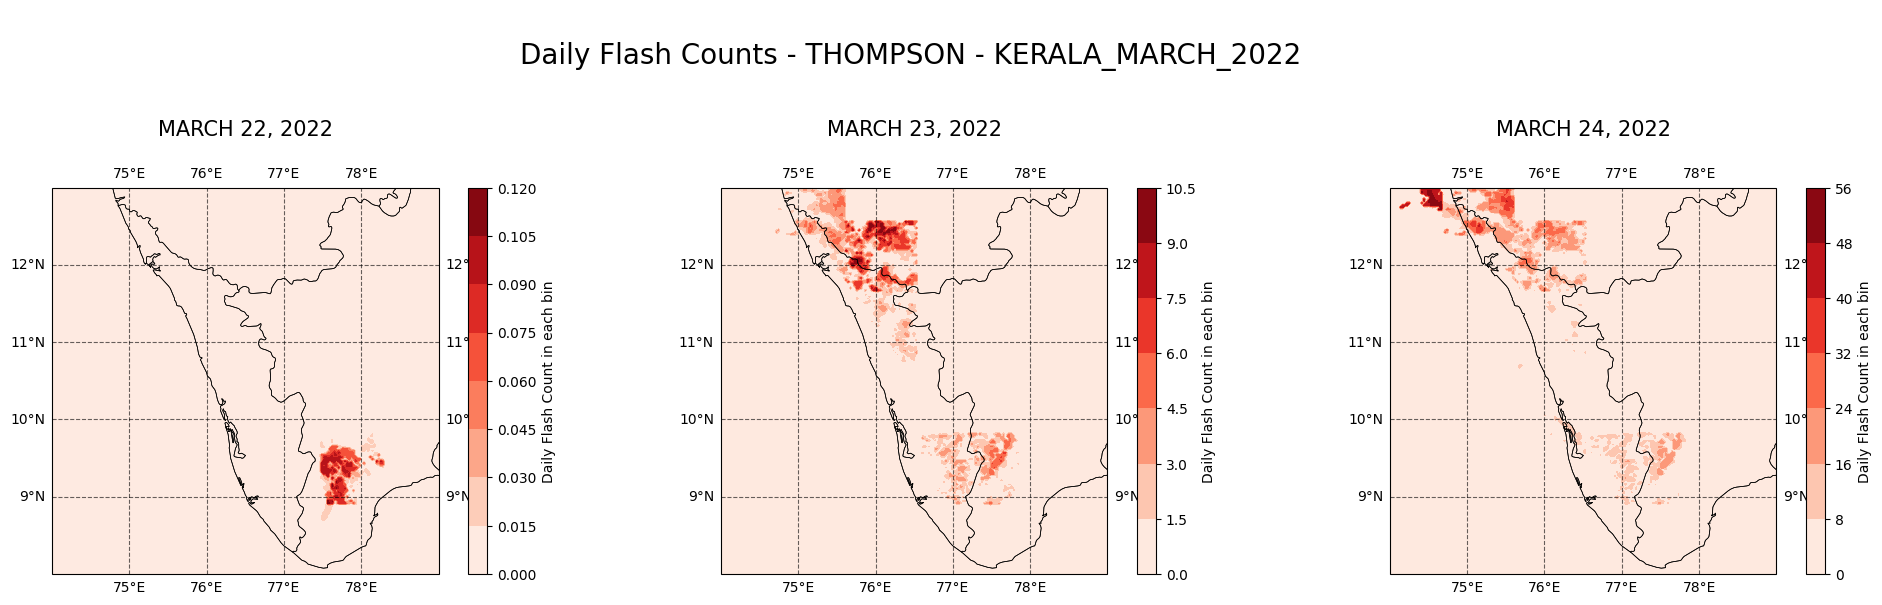

In [45]:

# Define the specific days to plot
days_to_plot = range(22, 25)

# Create subplots with larger figure size
fig, axes = plt.subplots(1, 3, figsize=(20, 6), subplot_kw={'projection': ccrs.PlateCarree()})

plt.suptitle('\nDaily Flash Counts - THOMPSON - KERALA_MARCH_2022\n', fontsize=20)

# Iterate over each day in April
for i, day in enumerate(days_to_plot):
    # Filter CG_FLASHES_THOMPSON for the current day
    CG_FLASHES_THOMPSON_daily = CG_FLASHES_THOMPSON.sel(time=f'2022-03-{day}')

    x = CG_FLASHES_THOMPSON_daily['lon']
    y = CG_FLASHES_THOMPSON_daily['lat']

    ax = axes[i]

    ax.set_extent([74, 79, 8, 13], crs=ccrs.PlateCarree())

    hist = CG_FLASHES_THOMPSON_daily['fls'].sum(dim='time')  # Summing flash counts over time

    contours = ax.contourf(x, y, hist, cmap='Reds')
    cbar = plt.colorbar(contours, ax=ax, orientation='vertical', label='Daily Flash Count in each bin')

    ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5, edgecolor='gray')
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
    ax.add_feature(cfeature.STATES, linestyle='-', linewidth=0.5, edgecolor='black')

    ax.gridlines(draw_labels=True, color='black', alpha=0.6, linestyle='--')

    ax.set_title(f'\n\nMARCH {day}, 2022\n', fontsize=15)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

plt.tight_layout()
plt.show()


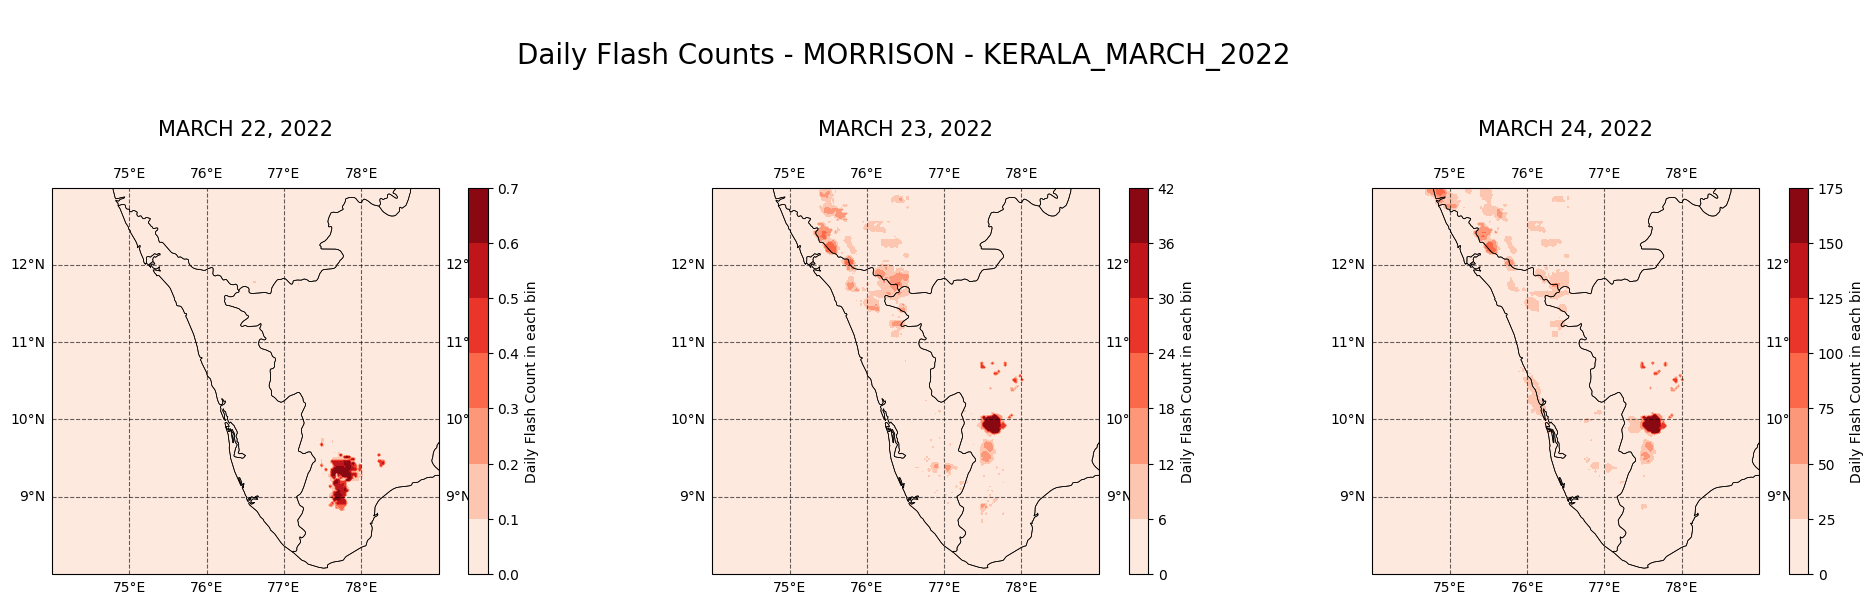

In [46]:
# Define the specific days to plot
days_to_plot = range(22, 25)

# Create subplots with larger figure size
fig, axes = plt.subplots(1, 3, figsize=(20, 6), subplot_kw={'projection': ccrs.PlateCarree()})

plt.suptitle('\nDaily Flash Counts - MORRISON - KERALA_MARCH_2022\n', fontsize=20)

# Iterate over each day in April
for i, day in enumerate(days_to_plot):
    # Filter CG_FLASHES_MORRISON for the current day
    CG_FLASHES_MORRISON_daily = CG_FLASHES_MORRISON.sel(time=f'2022-03-{day}')

    x = CG_FLASHES_MORRISON_daily['lon']
    y = CG_FLASHES_MORRISON_daily['lat']

    ax = axes[i]

    ax.set_extent([74, 79, 8, 13], crs=ccrs.PlateCarree())

    hist = CG_FLASHES_MORRISON_daily['cg'].sum(dim='time')  # Summing flash counts over time

    contours = ax.contourf(x, y, hist, cmap='Reds')
    cbar = plt.colorbar(contours, ax=ax, orientation='vertical', label='Daily Flash Count in each bin')

    ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5, edgecolor='gray')
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
    ax.add_feature(cfeature.STATES, linestyle='-', linewidth=0.5, edgecolor='black')

    ax.gridlines(draw_labels=True, color='black', alpha=0.6, linestyle='--')

    ax.set_title(f'\n\nMARCH {day}, 2022\n', fontsize=15)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

plt.tight_layout()
plt.show()


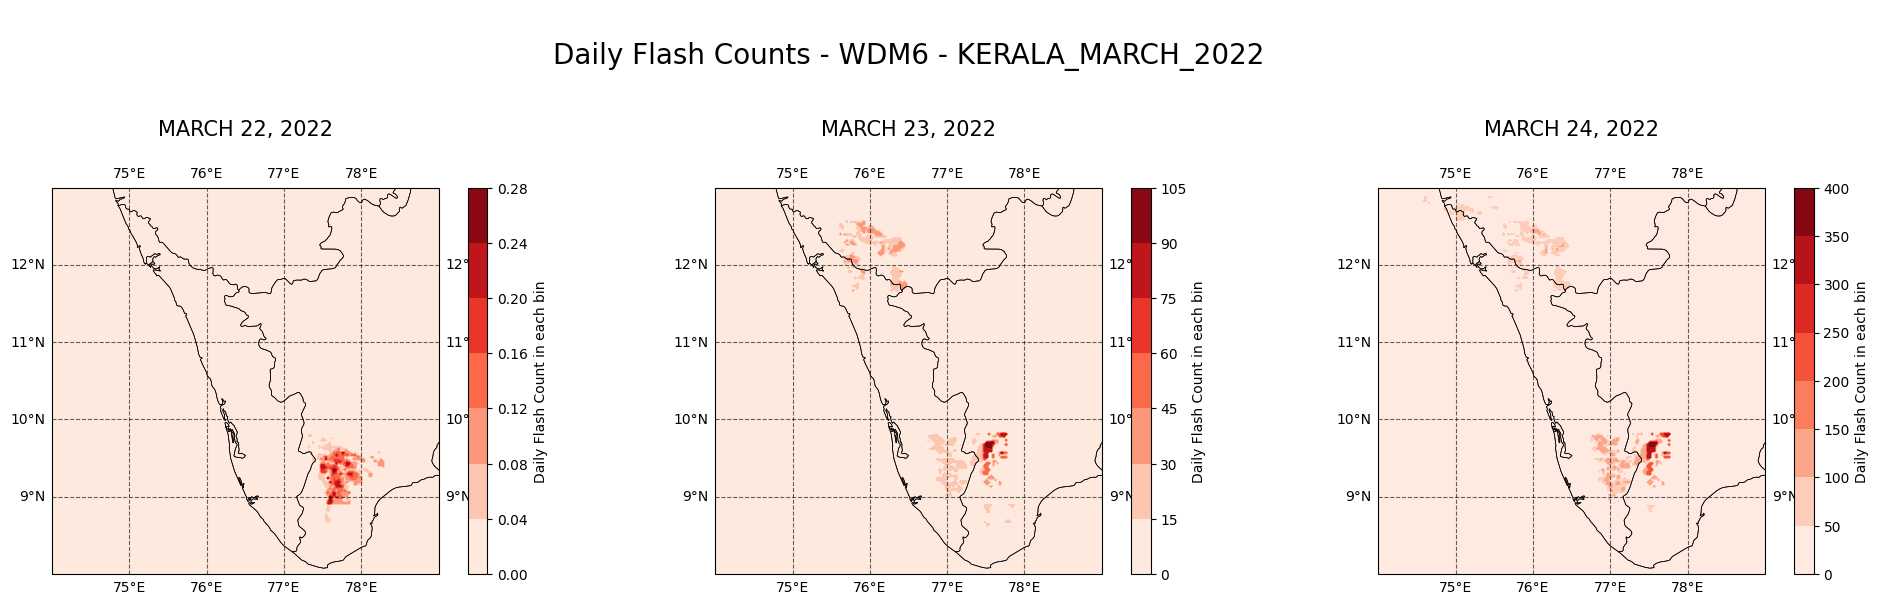

In [47]:
# Define the specific days to plot
days_to_plot = range(22, 25)

# Create subplots with larger figure size
fig, axes = plt.subplots(1, 3, figsize=(20, 6), subplot_kw={'projection': ccrs.PlateCarree()})

plt.suptitle('\nDaily Flash Counts - WDM6 - KERALA_MARCH_2022\n', fontsize=20)

# Iterate over each day in April
for i, day in enumerate(days_to_plot):
    # Filter CG_FLASHES_WDM6 for the current day
    CG_FLASHES_WDM6_daily = CG_FLASHES_WDM6.sel(time=f'2022-03-{day}')

    x = CG_FLASHES_WDM6_daily['lon']
    y = CG_FLASHES_WDM6_daily['lat']

    ax = axes[i]

    ax.set_extent([74, 79, 8, 13], crs=ccrs.PlateCarree())

    hist = CG_FLASHES_WDM6_daily['cg'].sum(dim='time')  # Summing flash counts over time

    contours = ax.contourf(x, y, hist, cmap='Reds')
    cbar = plt.colorbar(contours, ax=ax, orientation='vertical', label='Daily Flash Count in each bin')

    ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5, edgecolor='gray')
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
    ax.add_feature(cfeature.STATES, linestyle='-', linewidth=0.5, edgecolor='black')

    ax.gridlines(draw_labels=True, color='black', alpha=0.6, linestyle='--')

    ax.set_title(f'\n\nMARCH {day}, 2022\n', fontsize=15)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

plt.tight_layout()
plt.show()

In [34]:
THOMPSON_flash_data_march_23 = CG_FLASHES_THOMPSON.sel(time='2022-03-23')

df1 = THOMPSON_flash_data_march_23.to_dataframe()

filtered_data1 = df1[df1['fls'] != 0]

filtered_data1

fls
lon      lat      time                             
73.78310 13.35925 2022-03-23 11:00:00  1.393377e-08
                  2022-03-23 11:30:00  2.497595e-06
                  2022-03-23 12:00:00  2.497595e-06
                  2022-03-23 12:30:00  2.497595e-06
                  2022-03-23 13:00:00  2.497595e-06
...                                             ...
79.29923 13.35925 2022-03-23 21:30:00  1.997163e-07
                  2022-03-23 22:00:00  1.997163e-07
                  2022-03-23 22:30:00  1.997163e-07
                  2022-03-23 23:00:00  1.997163e-07
                  2022-03-23 23:30:00  1.997163e-07

[495606 rows x 1 columns]

In [48]:
sum_of_flashes = filtered_data1['fls'].sum()

# Print the sum of flashes
print("Sum of flashes:", sum_of_flashes)


Sum of flashes: 10010.740434257921


In [35]:
MORRISON_flash_data_march_23 = CG_FLASHES_MORRISON.sel(time='2022-03-23')

df2 = MORRISON_flash_data_march_23.to_dataframe()

filtered_data2 = df2[df2['cg'] != 0]

filtered_data2

cg
lon      lat       time                             
73.78310 8.130525  2022-03-23 15:30:00  3.098268e-08
                   2022-03-23 16:00:00  2.904974e-06
                   2022-03-23 16:30:00  2.904974e-06
                   2022-03-23 17:00:00  2.904974e-06
                   2022-03-23 17:30:00  2.904974e-06
...                                              ...
79.29923 11.537050 2022-03-23 21:30:00  9.162662e-04
                   2022-03-23 22:00:00  9.162662e-04
                   2022-03-23 22:30:00  9.162662e-04
                   2022-03-23 23:00:00  9.162662e-04
                   2022-03-23 23:30:00  9.162662e-04

[331151 rows x 1 columns]

In [49]:
sum_of_flashes = filtered_data2['cg'].sum()

# Print the sum of flashes
print("Sum of flashes:", sum_of_flashes)

Sum of flashes: 20339.570072395378


In [36]:
WDM6_flash_data_march_23 = CG_FLASHES_WDM6.sel(time='2022-03-23')

df3 = WDM6_flash_data_march_23.to_dataframe()

filtered_data3 = df3[df3['cg'] != 0]

filtered_data3

cg
lon      lat      time                         
73.78310 12.69082 2022-03-23 09:00:00  0.000002
                  2022-03-23 09:30:00  0.000104
                  2022-03-23 10:00:00  0.000104
                  2022-03-23 10:30:00  0.000104
                  2022-03-23 11:00:00  0.000104
...                                         ...
79.29923 12.77113 2022-03-23 21:30:00  0.000153
                  2022-03-23 22:00:00  0.000153
                  2022-03-23 22:30:00  0.000153
                  2022-03-23 23:00:00  0.000153
                  2022-03-23 23:30:00  0.000153

[324072 rows x 1 columns]

In [50]:
sum_of_flashes = filtered_data3['cg'].sum()

# Print the sum of flashes
print("Sum of flashes:", sum_of_flashes)

Sum of flashes: 27609.887224787428


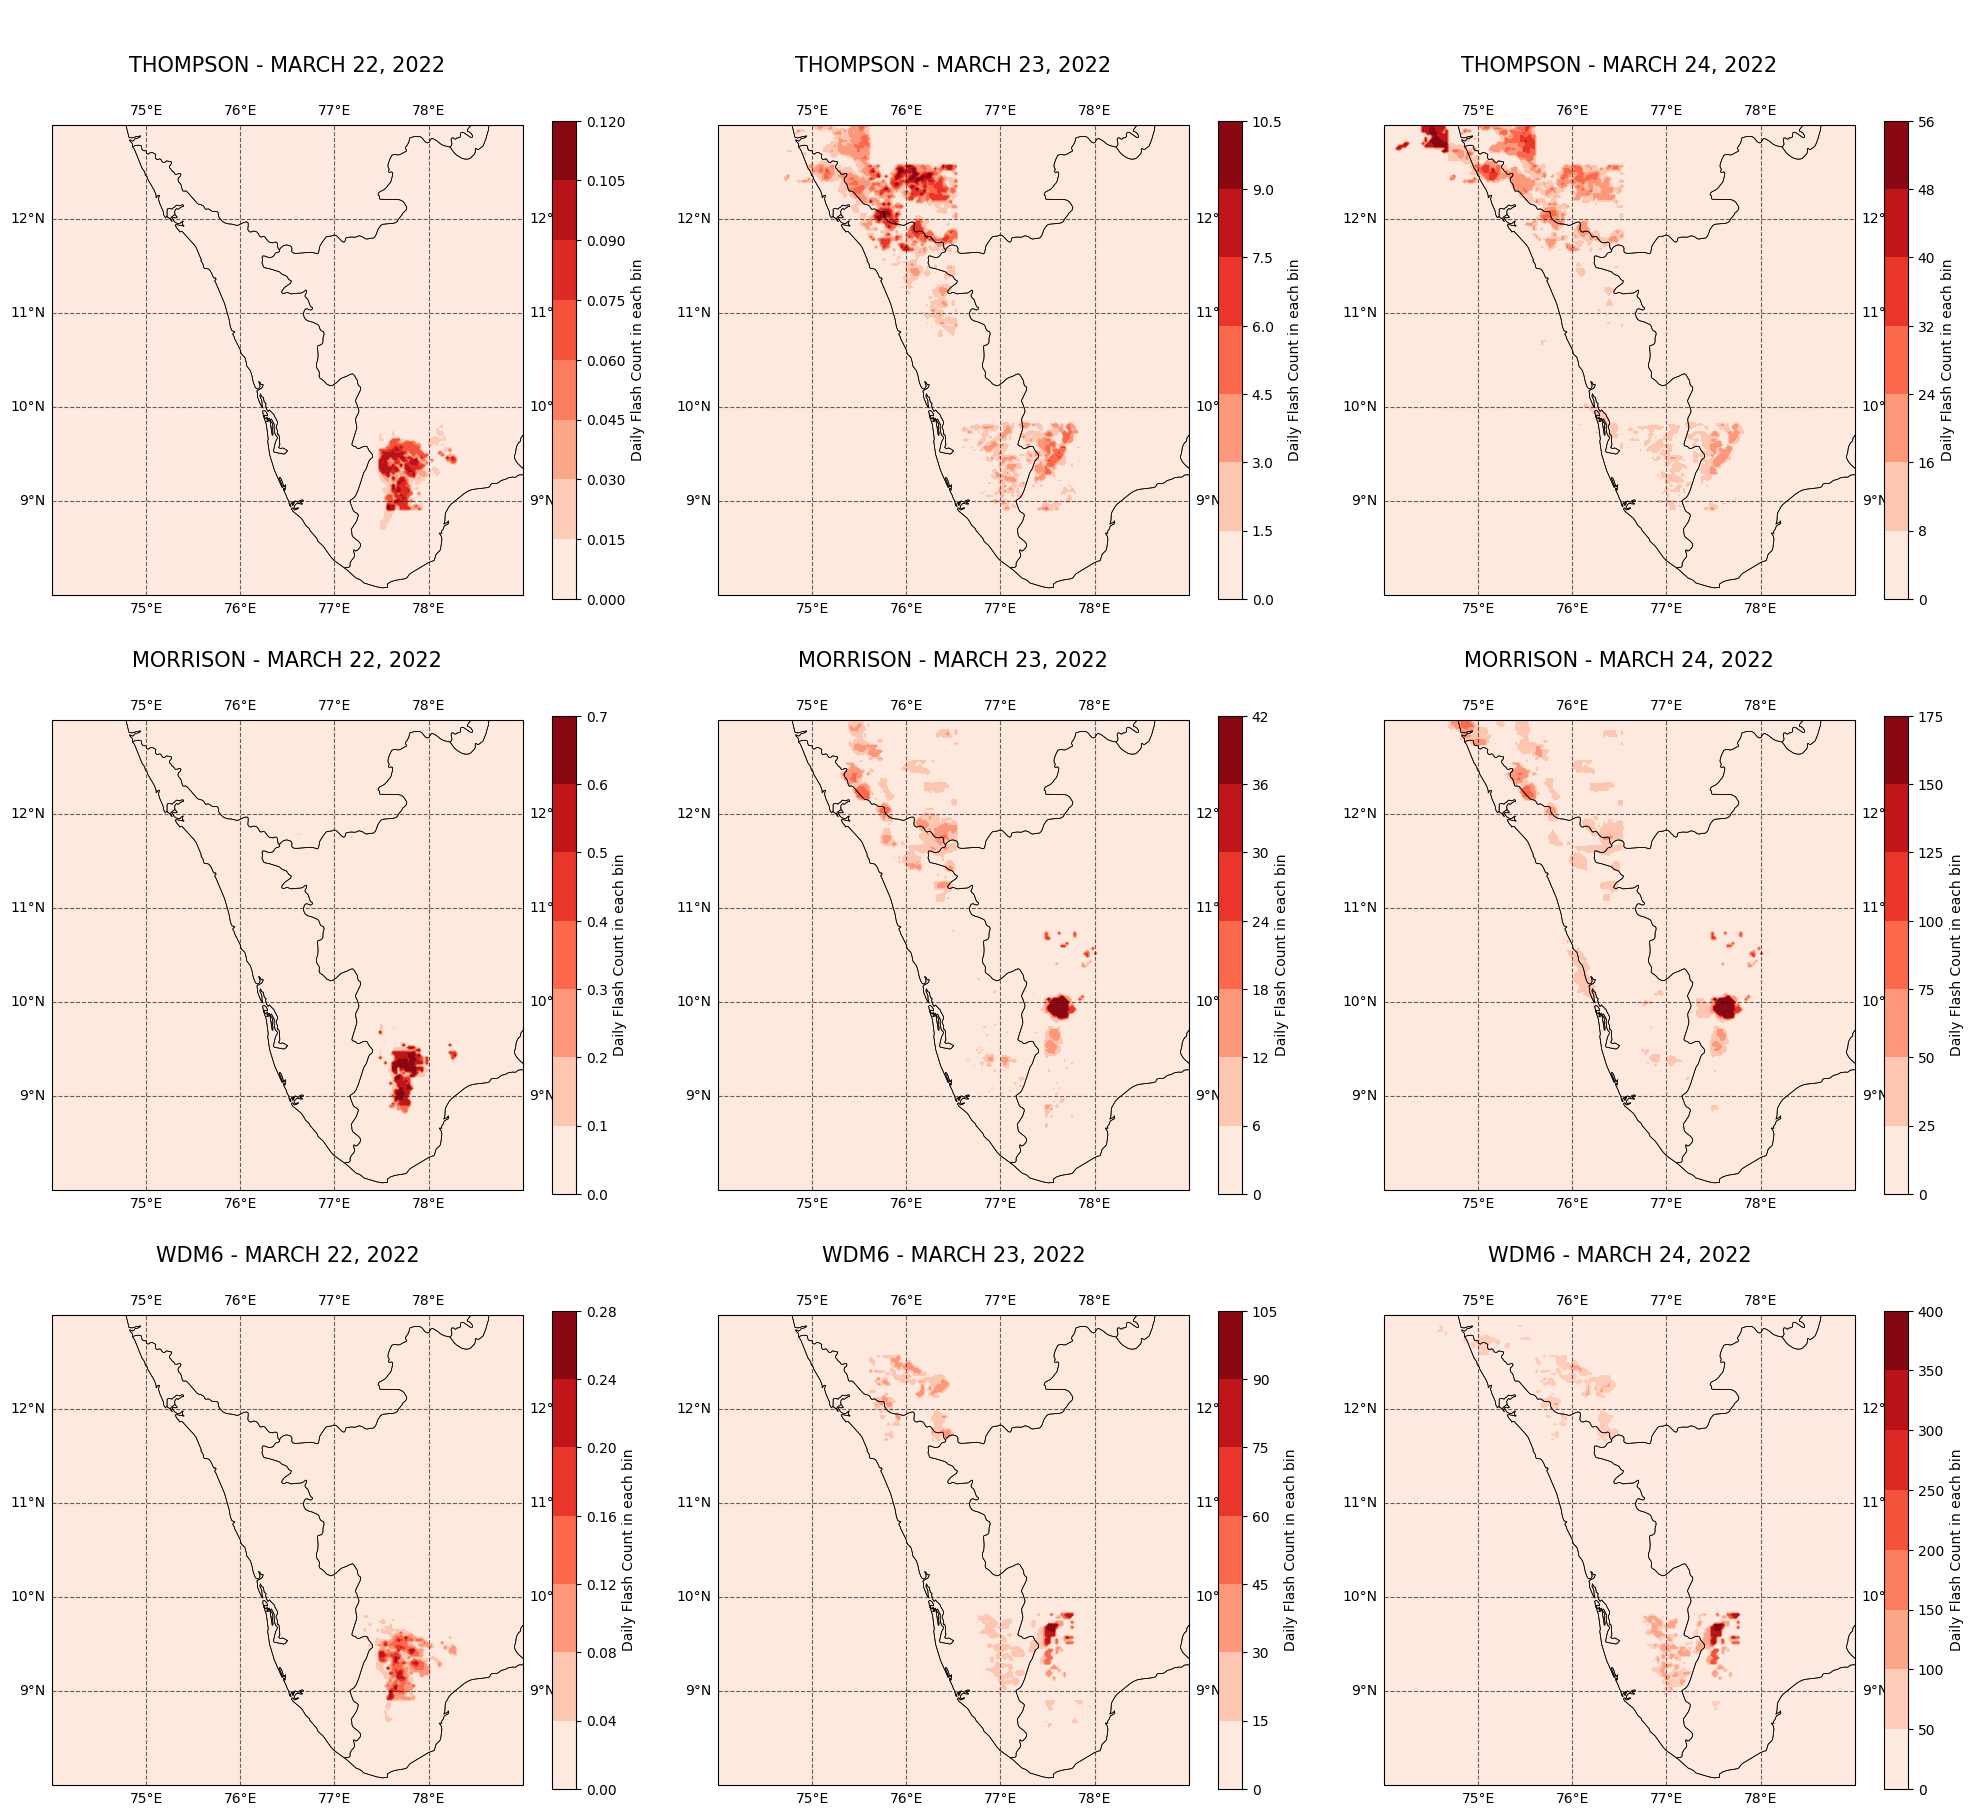

In [60]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Define the specific days to plot
days_to_plot = range(22, 25)

# Define datasets (assuming they are already loaded)
datasets = [CG_FLASHES_THOMPSON, CG_FLASHES_MORRISON, CG_FLASHES_WDM6]
dataset_names = ['THOMPSON', 'MORRISON', 'WDM6']

# Create subplots with larger figure size
fig, axes = plt.subplots(3, 3, figsize=(20, 18), subplot_kw={'projection': ccrs.PlateCarree()})

for row, dataset in enumerate(datasets):
    for col, day in enumerate(days_to_plot):
        # Filter the dataset for the current day
        dataset_daily = dataset.sel(time=f'2022-03-{day}')

        x = dataset_daily['lon']
        y = dataset_daily['lat']

        ax = axes[row, col]

        ax.set_extent([74, 79, 8, 13], crs=ccrs.PlateCarree())

        hist = dataset_daily['cg'].sum(dim='time')  # Summing flash counts over time

        contours = ax.contourf(x, y, hist, cmap='Reds')
        cbar = plt.colorbar(contours, ax=ax, orientation='vertical', label='Daily Flash Count in each bin')

        ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5, edgecolor='gray')
        ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
        ax.add_feature(cfeature.STATES, linestyle='-', linewidth=0.5, edgecolor='black')

        ax.gridlines(draw_labels=True, color='black', alpha=0.6, linestyle='--')

        ax.set_title(f'\n\n{dataset_names[row]} - MARCH {day}, 2022\n', fontsize=15)
        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')

plt.tight_layout()
plt.show()

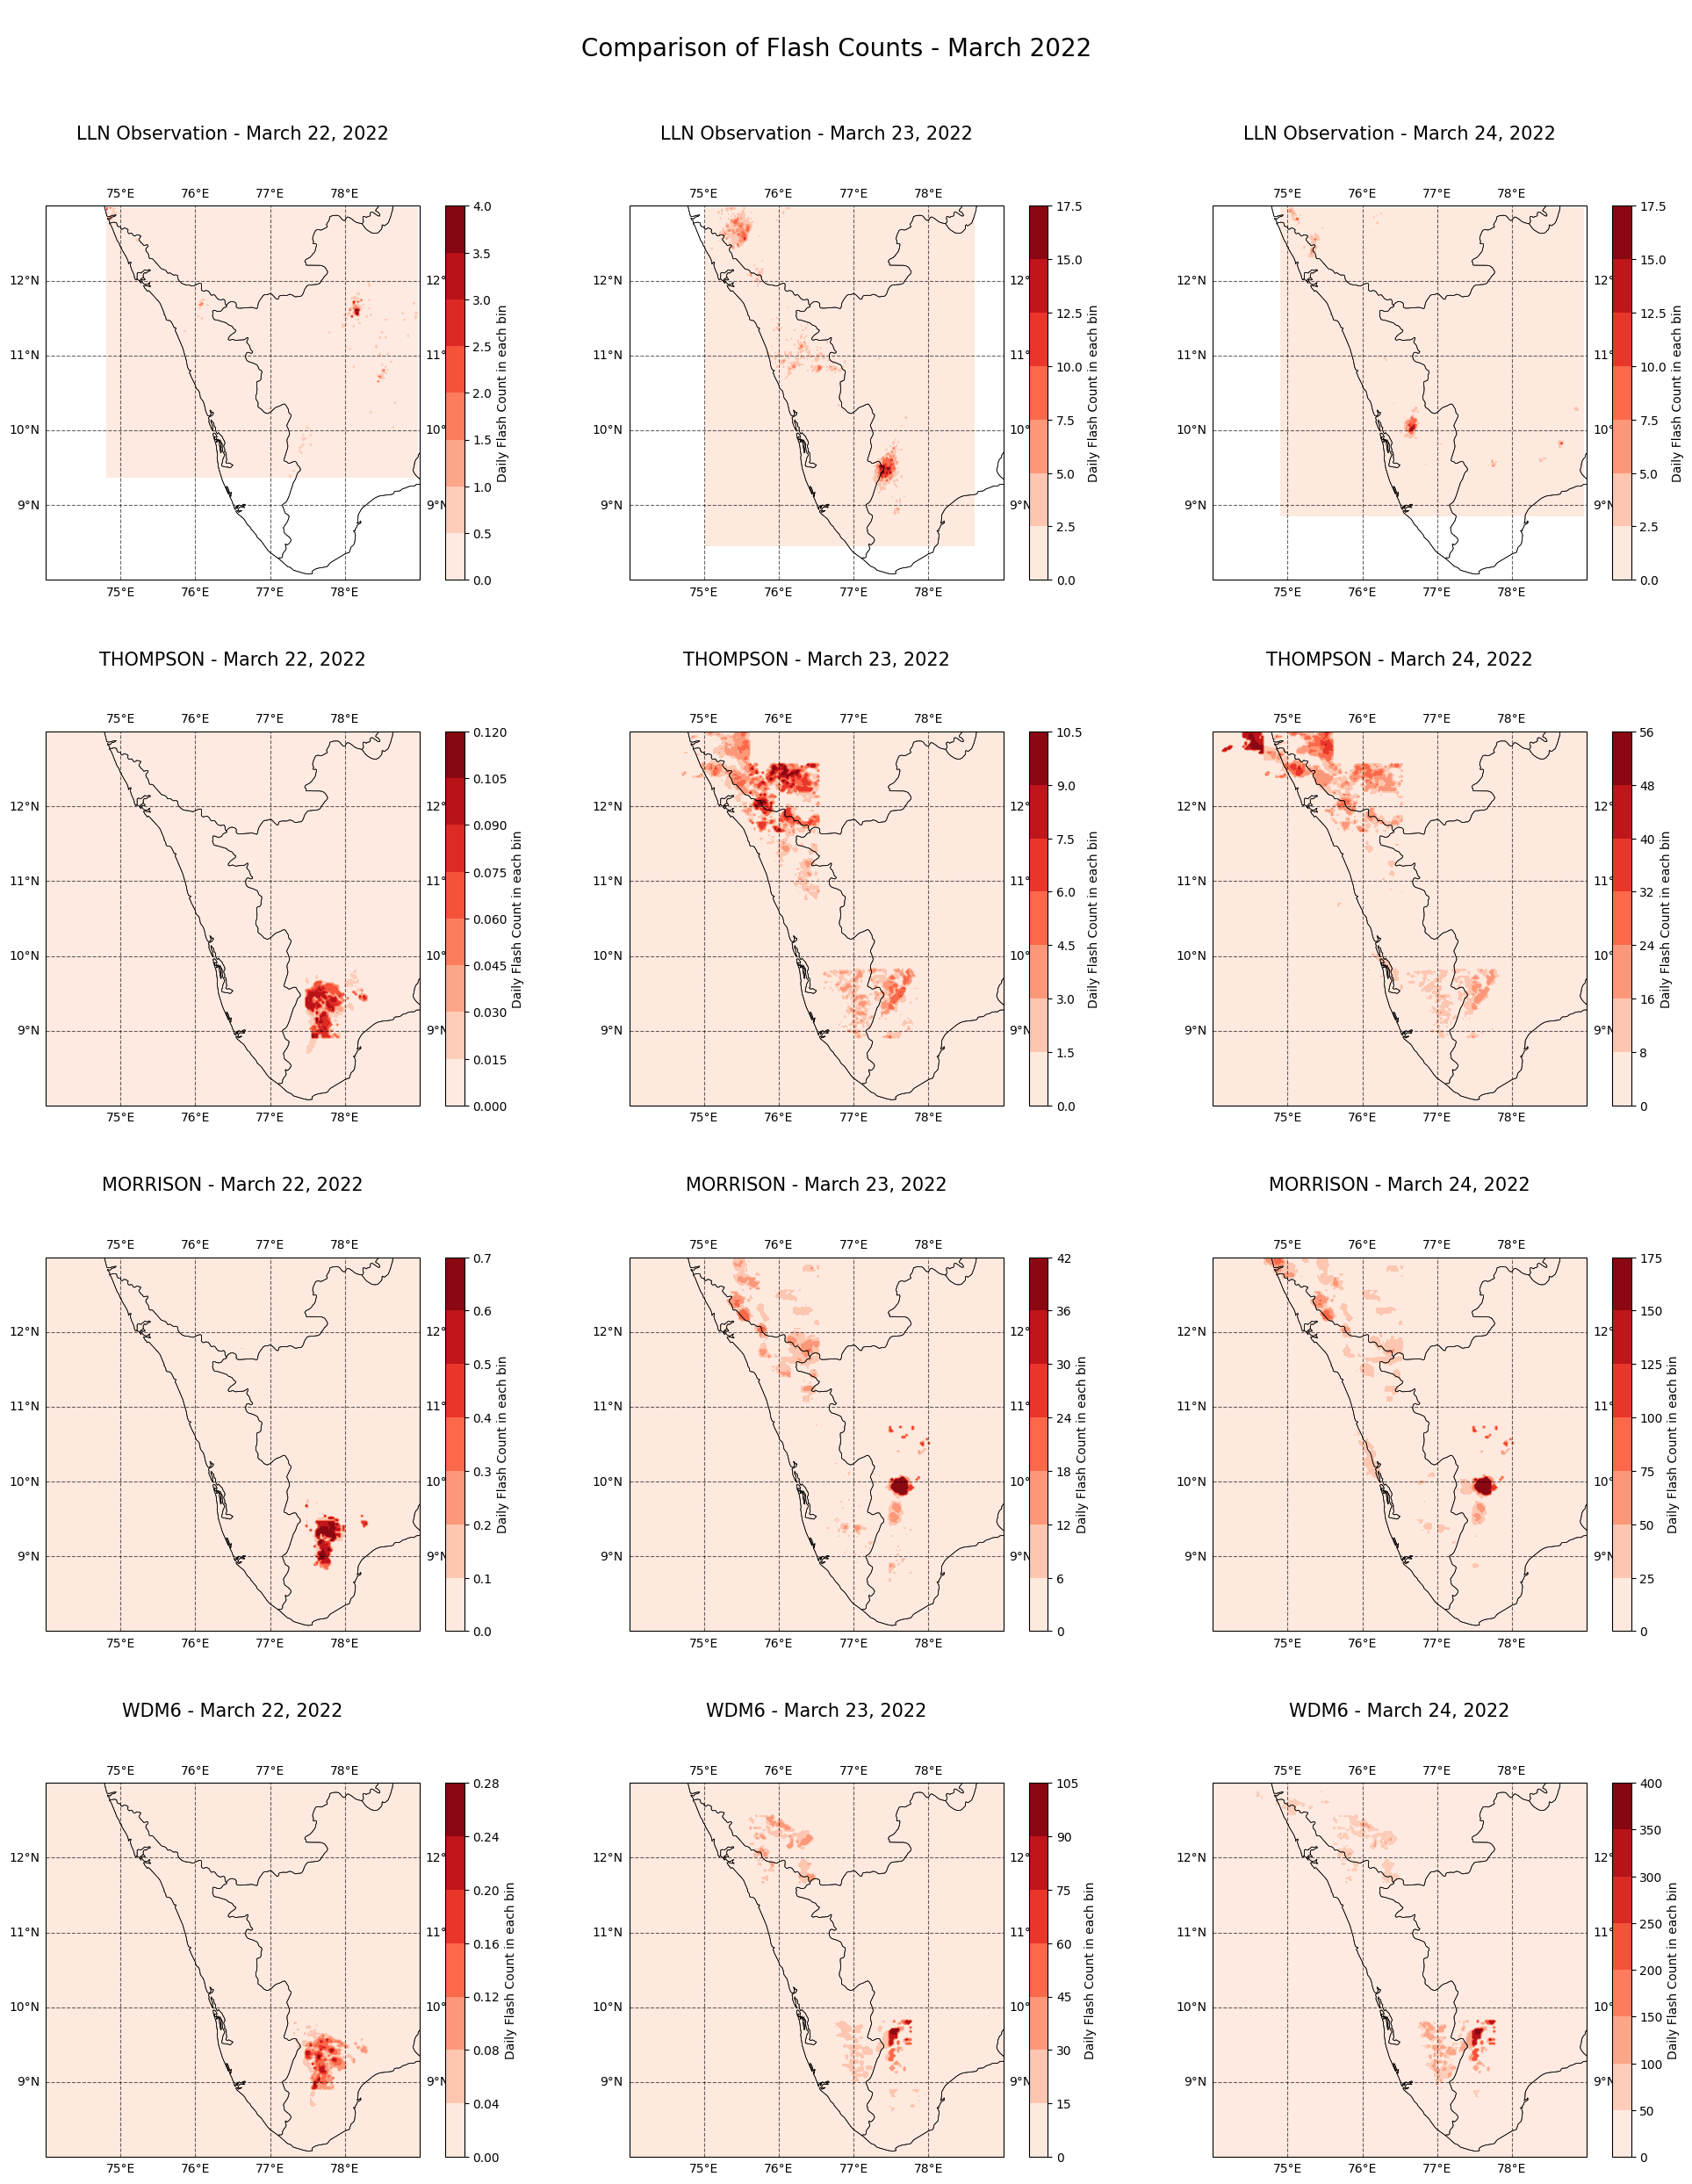

In [69]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# Define the specific days to plot
days_to_plot = range(22, 25)

# Define datasets (assuming they are already loaded)
datasets = [CG_FLASHES_THOMPSON, CG_FLASHES_MORRISON, CG_FLASHES_WDM6]
dataset_names = ['THOMPSON', 'MORRISON', 'WDM6']

# Create subplots with larger figure size
fig, axes = plt.subplots(4, 3, figsize=(20, 26), subplot_kw={'projection': ccrs.PlateCarree()})

plt.suptitle('\nComparison of Flash Counts - March 2022', fontsize=20)

# Plotting for LLN Observation - Kerala March 2022
for i, day in enumerate(days_to_plot):
    # Filter data for the current day
    data_daily = KERALA_MARCH_2022[KERALA_MARCH_2022['LightningTimeString'].dt.day == day]

    x = data_daily['Longitude']
    y = data_daily['Latitude']

    ax = axes[0, i]

    ax.set_extent([74, 79, 8, 13], crs=ccrs.PlateCarree())

    hist, xedges, yedges = np.histogram2d(x, y, bins=167, density=False)

    contours = ax.contourf(xedges[:-1], yedges[:-1], hist.T, cmap='Reds')
    cbar = plt.colorbar(contours, ax=ax, orientation='vertical', label='Daily Flash Count in each bin')

    ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5, edgecolor='gray')
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
    ax.add_feature(cfeature.STATES, linestyle='-', linewidth=0.5, edgecolor='black')

    ax.gridlines(draw_labels=True, color='black', alpha=0.6, linestyle='--')

    ax.set_title(f'LLN Observation - March {day}, 2022\n\n', fontsize=15)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

# Plotting for CG Flash datasets
for row, dataset in enumerate(datasets):
    for col, day in enumerate(days_to_plot):
        # Filter the dataset for the current day
        dataset_daily = dataset.sel(time=f'2022-03-{day}')

        x = dataset_daily['lon']
        y = dataset_daily['lat']

        ax = axes[row + 1, col]

        ax.set_extent([74, 79, 8, 13], crs=ccrs.PlateCarree())

        hist = dataset_daily['cg'].sum(dim='time')  # Summing flash counts over time

        contours = ax.contourf(x, y, hist, cmap='Reds')
        cbar = plt.colorbar(contours, ax=ax, orientation='vertical', label='Daily Flash Count in each bin')

        ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5, edgecolor='gray')
        ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
        ax.add_feature(cfeature.STATES, linestyle='-', linewidth=0.5, edgecolor='black')

        ax.gridlines(draw_labels=True, color='black', alpha=0.6, linestyle='--')

        ax.set_title(f'\n\n\n\n{dataset_names[row]} - March {day}, 2022\n\n', fontsize=15)
        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


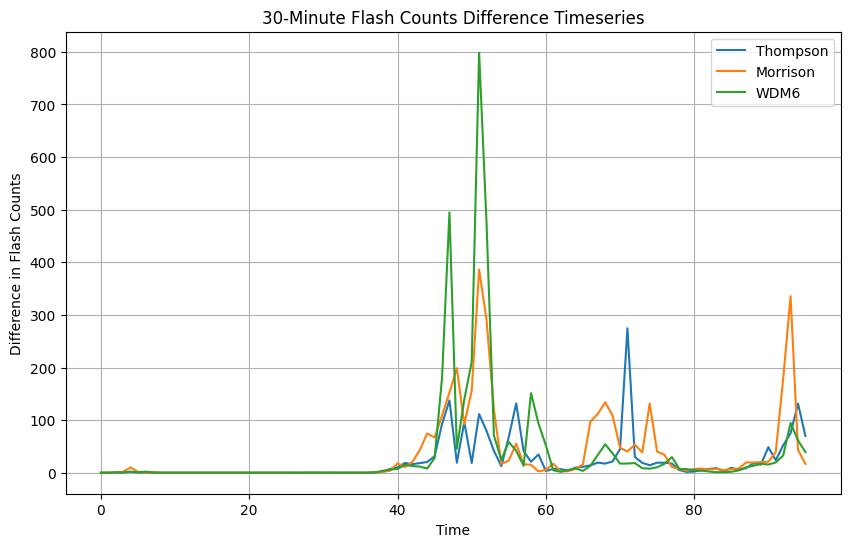

In [33]:
CG_FLASHES_THOMPSON_FLASH_COUNTS = CG_FLASHES_THOMPSON['cg']
CG_FLASHES_MORRISON_FLASH_COUNTS = CG_FLASHES_MORRISON['cg']
CG_FLASHES_WDM6_FLASH_COUNTS = CG_FLASHES_WDM6['cg']

# Resample the data to get flash counts for every 30-minute interval
flash_counts_30min_thompson = CG_FLASHES_THOMPSON_FLASH_COUNTS.resample(time='30T').sum(dim=('lat', 'lon'))
flash_counts_30min_morrison = CG_FLASHES_MORRISON_FLASH_COUNTS.resample(time='30T').sum(dim=('lat', 'lon'))
flash_counts_30min_wdm6 = CG_FLASHES_WDM6_FLASH_COUNTS.resample(time='30T').sum(dim=('lat', 'lon'))

# Calculate the difference between consecutive time steps
diff_thompson = flash_counts_30min_thompson.diff(dim='time', n=1)
diff_morrison = flash_counts_30min_morrison.diff(dim='time', n=1)
diff_wdm6 = flash_counts_30min_wdm6.diff(dim='time', n=1)

# Plot the difference with line plots and markers
plt.figure(figsize=(10, 6))

diff_thompson.plot.line(label='Thompson')  # Plot the difference for Thompson
diff_morrison.plot.line(label='Morrison')  # Plot the difference for Morrison
diff_wdm6.plot.line(label='WDM6')  # Plot the difference for WDM6

plt.title('30-Minute Flash Counts Difference Timeseries')
plt.xlabel('Time')
plt.ylabel('Difference in Flash Counts')
plt.legend()  # Show legend with model names
plt.grid(True)

plt.show()


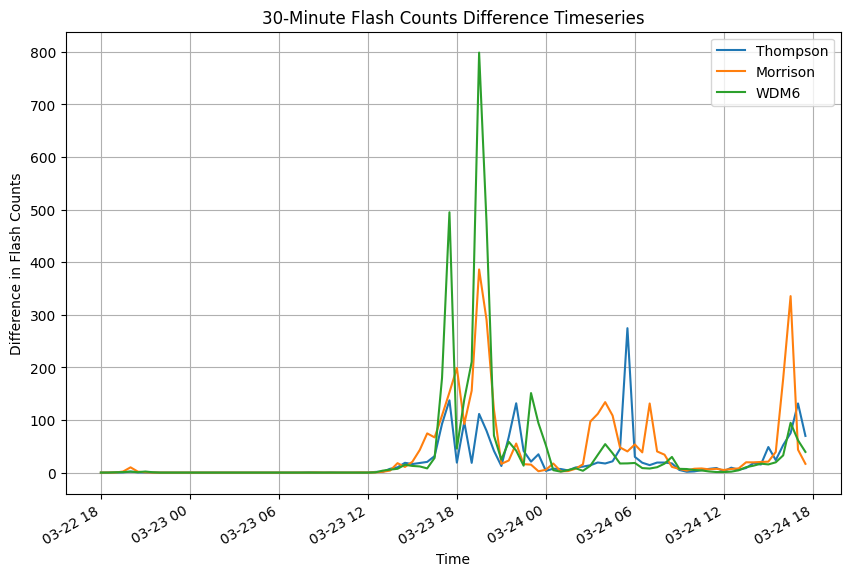

In [37]:
CG_FLASHES_THOMPSON_FLASH_COUNTS = CG_FLASHES_THOMPSON['cg']
CG_FLASHES_MORRISON_FLASH_COUNTS = CG_FLASHES_MORRISON['cg']
CG_FLASHES_WDM6_FLASH_COUNTS = CG_FLASHES_WDM6['cg']

# Resample the data to get flash counts for every 30-minute interval
flash_counts_30min_thompson = CG_FLASHES_THOMPSON_FLASH_COUNTS.sum(dim=('lat', 'lon'))
flash_counts_30min_morrison = CG_FLASHES_MORRISON_FLASH_COUNTS.sum(dim=('lat', 'lon'))
flash_counts_30min_wdm6 = CG_FLASHES_WDM6_FLASH_COUNTS.sum(dim=('lat', 'lon'))

# Calculate the difference between consecutive time steps
diff_thompson = flash_counts_30min_thompson.diff(dim='time', n=1)
diff_morrison = flash_counts_30min_morrison.diff(dim='time', n=1)
diff_wdm6 = flash_counts_30min_wdm6.diff(dim='time', n=1)

# Plot the difference with line plots and markers
plt.figure(figsize=(10, 6))

diff_thompson.plot.line(label='Thompson')  # Plot the difference for Thompson
diff_morrison.plot.line(label='Morrison')  # Plot the difference for Morrison
diff_wdm6.plot.line(label='WDM6')  # Plot the difference for WDM6

plt.title('30-Minute Flash Counts Difference Timeseries')
plt.xlabel('Time')
plt.ylabel('Difference in Flash Counts')
plt.legend()  # Show legend with model names
plt.grid(True)

plt.show()


In [27]:
flash_counts_30min_thompson.to_dataframe()

cg
time             
0        0.000000
1        0.000047
2        0.091853
3        0.391004
4        0.952891
...           ...
92    1748.449924
93    1800.714926
94    1875.723799
95    2007.171629
96    2076.896047

[97 rows x 1 columns]

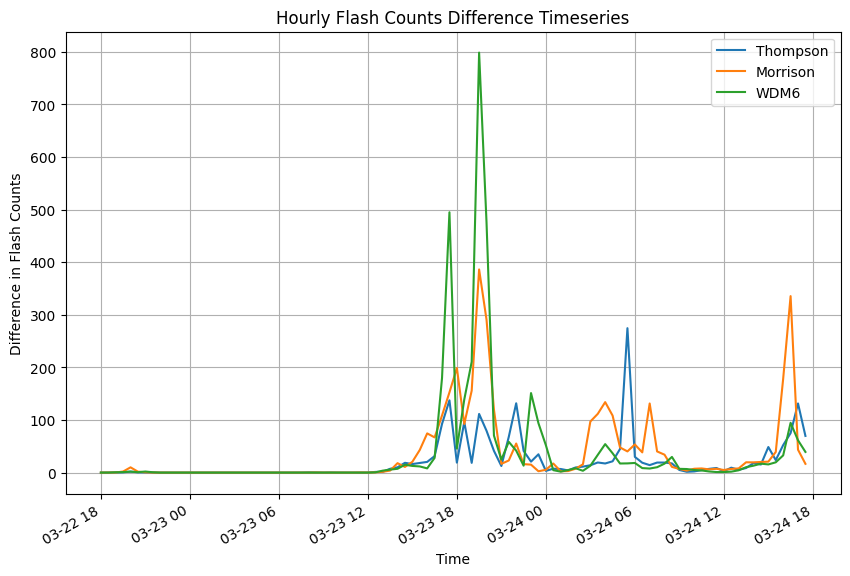

In [7]:
import matplotlib.pyplot as plt

# Calculate the difference between consecutive time steps
diff_thompson = flash_counts_hourly_thompson.diff(dim='time', n=1)
diff_morrison = flash_counts_hourly_morrison.diff(dim='time', n=1)
diff_wdm6 = flash_counts_hourly_wdm6.diff(dim='time', n=1)

# Plot the difference
plt.figure(figsize=(10, 6))

diff_thompson.plot(label='Thompson')  # Plot the difference for Thompson
diff_morrison.plot(label='Morrison')  # Plot the difference for Morrison
diff_wdm6.plot(label='WDM6')  # Plot the difference for WDM6

plt.title('Hourly Flash Counts Difference Timeseries')
plt.xlabel('Time')
plt.ylabel('Difference in Flash Counts')
plt.legend()  # Show legend with model names
plt.grid(True)

plt.show()


In [89]:

KERALA_MARCH_2022['LightningTimeString'] = pd.to_datetime(KERALA_MARCH_2022['LightningTimeString'])

# Define start and end timestamps
start_timestamp = pd.Timestamp('2022-03-22 17:30:00')
end_timestamp = pd.Timestamp('2022-03-24 17:30:00')

# Select data within the specified time range
selected_data = KERALA_MARCH_2022[(KERALA_MARCH_2022['LightningTimeString'] >= start_timestamp) & (KERALA_MARCH_2022['LightningTimeString'] <= end_timestamp)]

selected_data


/tmp/ipykernel_4760/3182005002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KERALA_MARCH_2022['LightningTimeString'] = pd.to_datetime(KERALA_MARCH_2022['LightningTimeString'])


LightningTimeString  Latitude  Longitude  StrokeType  \
47060302 2022-03-22 20:32:43.570550560   9.81955   77.54358           1   
47060303 2022-03-22 20:33:47.878616631   9.95558   77.44384           1   
47060304 2022-03-22 20:35:22.953445315   9.89753   77.48448           1   
47060307 2022-03-22 20:39:18.440023422  10.02611   77.52864           1   
47060310 2022-03-22 20:42:06.453096985   9.77538   77.40978           1   
...                                ...       ...        ...         ...   
47084695 2022-03-24 17:23:22.751956939   9.93580   76.48021           1   
47084734 2022-03-24 17:25:02.324088394  10.17236   76.56911           1   
47084781 2022-03-24 17:27:22.431107759   9.52875   77.77748           1   
47084793 2022-03-24 17:27:57.905896484   9.58886   77.75307           1   
47084818 2022-03-24 17:29:01.760064482   9.55700   77.76168           1   

                Date  
47060302  2022-03-22  
47060303  2022-03-22  
47060304  2022-03-22  
47060307  2022-03-22  
47060310  2022-03-22  
...              ...  
47084695  2022-03-24  
47084734  2022-03-24  
47084781  2022-03-24  
47084793  2022-03-24  
47084818  2022-03-24  

[6897 rows x 5 columns]

/tmp/ipykernel_4760/1481417822.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['LightningTimeString'] = pd.to_datetime(selected_data['LightningTimeString'])


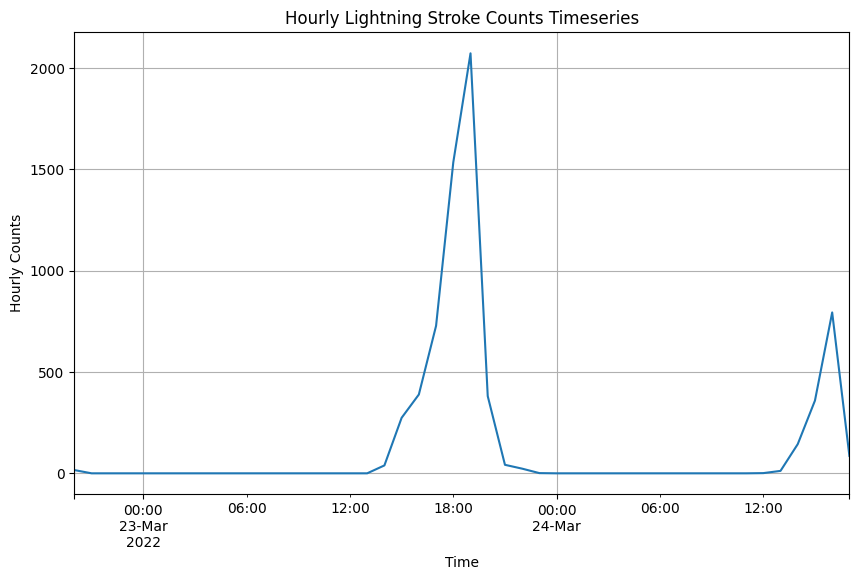

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'selected_data'

# Convert 'LightningTimeString' column to datetime
selected_data['LightningTimeString'] = pd.to_datetime(selected_data['LightningTimeString'])

# Set 'LightningTimeString' as the index
selected_data.set_index('LightningTimeString', inplace=True)

# Resample data to hourly frequency and calculate hourly counts
hourly_counts = selected_data['StrokeType'].resample('1H').sum()

# Plot timeseries
plt.figure(figsize=(10, 6))
hourly_counts.plot()
plt.title('Hourly Lightning Stroke Counts Timeseries')
plt.xlabel('Time')
plt.ylabel('Hourly Counts')
plt.grid(True)
plt.show()


/tmp/ipykernel_4760/3883581731.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['LightningTimeString'] = pd.to_datetime(selected_data['LightningTimeString'])


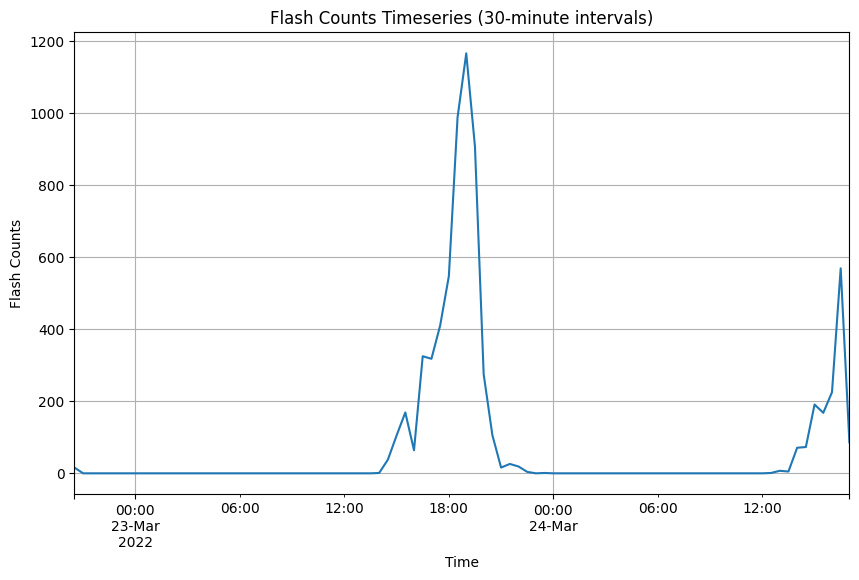

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'selected_data'

# Convert 'LightningTimeString' column to datetime
selected_data['LightningTimeString'] = pd.to_datetime(selected_data['LightningTimeString'])

# Set 'LightningTimeString' as the index
selected_data.set_index('LightningTimeString', inplace=True)

# Specify the desired time range
start_time = '2022-03-22 17:30:00'
end_time = '2022-03-24 17:30:00'

# Filter data within the specified time range
selected_data_range = selected_data.loc[start_time:end_time]

# Resample data to 30-minute frequency and calculate counts
counts_30min = selected_data_range['StrokeType'].resample('30T').sum()

# Plot timeseries
plt.figure(figsize=(10, 6))
counts_30min.plot()
plt.title('Flash Counts Timeseries (30-minute intervals)')
plt.xlabel('Time')
plt.ylabel('Flash Counts')
plt.grid(True)
plt.show()


In [122]:
CAPE_THOMPSON = xr.open_dataset(r"/home/krish/Documents/rinu_files/DATASETS/WRF_MODEL_DATASETS/KERALA_23MARCH_2022_THOMPSON/CAPE_THOMPSON__KERALA_23MARCH2022.nc")
CAPE_MORRISON = xr.open_dataset(r"/home/krish/Documents/rinu_files/DATASETS/WRF_MODEL_DATASETS/KERALA_23MARCH_2022_MORRISON/CAPE_MORRISON_KERALA_23MARCH2022.nc")
CAPE_WDM6 = xr.open_dataset(r"/home/krish/Documents/rinu_files/DATASETS/WRF_MODEL_DATASETS/KERALA_23MARCH_2022_WDM6/CAPE_WDM6_KERALA_23MARCH2022.nc")

CAPE_THOMPSON

<xarray.Dataset>
Dimensions:  (lon: 204, lat: 204, lev: 19, time: 97)
Coordinates:
  * lon      (lon) float64 73.76 73.78 73.81 73.84 ... 79.24 79.27 79.3 79.33
  * lat      (lat) float64 7.995 8.022 8.049 8.076 ... 13.39 13.41 13.44 13.47
  * lev      (lev) float64 1e+03 950.0 900.0 850.0 ... 250.0 200.0 150.0 100.0
  * time     (time) datetime64[ns] 2022-03-22T12:00:00 ... 2022-03-24T12:00:00
Data variables:
    cc       (time, lev, lat, lon) float64 ...

In [123]:
CAPE_THOMPSON = CAPE_THOMPSON['cc']
CAPE_MORRISON = CAPE_MORRISON['cc']
CAPE_WDM6 = CAPE_WDM6['cc']

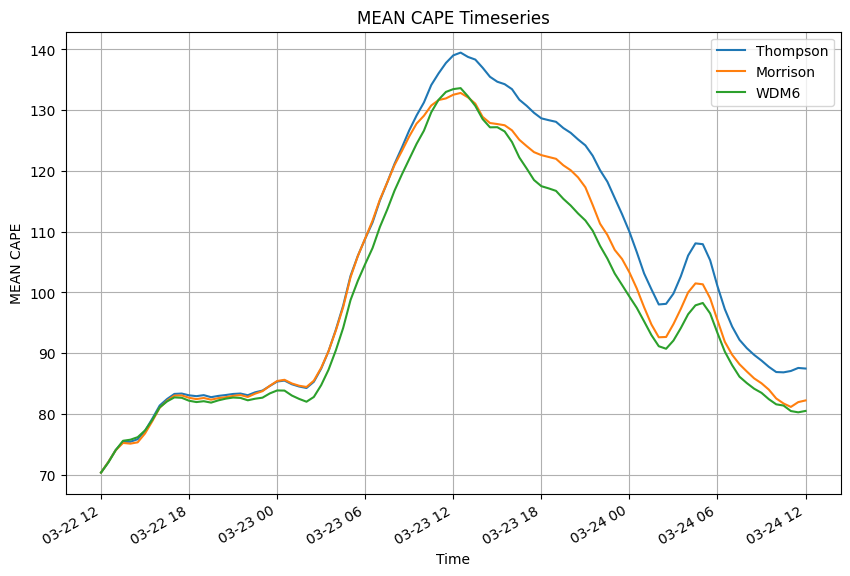

In [124]:

# Sum along lat and lon dimensions
MEAN_CAPE_THOMPSON = CAPE_THOMPSON.mean(dim=('lat', 'lon', 'lev'))
MEAN_CAPE_MORRISON = CAPE_MORRISON.mean(dim=('lat', 'lon', 'lev'))
MEAN_CAPE_WDM6 = CAPE_WDM6.mean(dim=('lat', 'lon', 'lev'))

# Convert time index to proper date format
MEAN_CAPE_THOMPSON['time'] = pd.to_datetime(MEAN_CAPE_THOMPSON.time.values)
MEAN_CAPE_MORRISON['time'] = pd.to_datetime(MEAN_CAPE_MORRISON.time.values)
MEAN_CAPE_WDM6['time'] = pd.to_datetime(MEAN_CAPE_WDM6.time.values)

# Plot timeseries
plt.figure(figsize=(10, 6))

MEAN_CAPE_THOMPSON.plot(x='time', label='Thompson')  
MEAN_CAPE_MORRISON.plot(x='time', label='Morrison')  
MEAN_CAPE_WDM6.plot(x='time', label='WDM6')  

plt.title('MEAN CAPE Timeseries')
plt.xlabel('Time')
plt.ylabel('MEAN CAPE')
plt.legend()  # Show legend with model names
plt.grid(True)

plt.show()

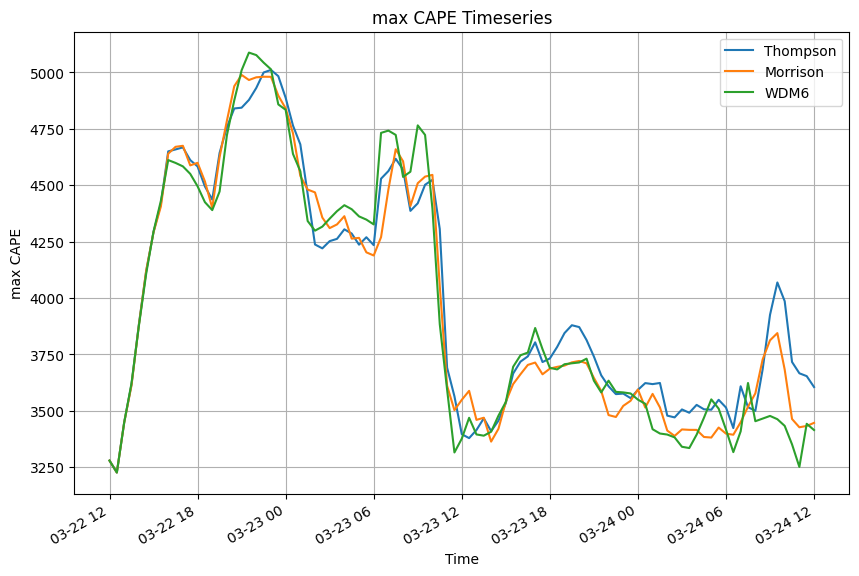

In [125]:

# Sum along lat and lon dimensions
max_CAPE_THOMPSON = CAPE_THOMPSON.max(dim=('lat', 'lon', 'lev'))
max_CAPE_MORRISON = CAPE_MORRISON.max(dim=('lat', 'lon', 'lev'))
max_CAPE_WDM6 = CAPE_WDM6.max(dim=('lat', 'lon', 'lev'))

# Convert time index to proper date format
max_CAPE_THOMPSON['time'] = pd.to_datetime(max_CAPE_THOMPSON.time.values)
max_CAPE_MORRISON['time'] = pd.to_datetime(max_CAPE_MORRISON.time.values)
max_CAPE_WDM6['time'] = pd.to_datetime(max_CAPE_WDM6.time.values)

# Plot timeseries
plt.figure(figsize=(10, 6))

max_CAPE_THOMPSON.plot(x='time', label='Thompson')  
max_CAPE_MORRISON.plot(x='time', label='Morrison')  
max_CAPE_WDM6.plot(x='time', label='WDM6')  

plt.title('max CAPE Timeseries')
plt.xlabel('Time')
plt.ylabel('max CAPE')
plt.legend()  # Show legend with model names
plt.grid(True)

plt.show()

In [126]:
CAPE_THOMPSON_850 = CAPE_THOMPSON.sel(lev=(CAPE_THOMPSON.lev == 850.0))
CAPE_MORRISON_850 = CAPE_MORRISON.sel(lev=(CAPE_MORRISON.lev == 850.0))
CAPE_WDM6_850 = CAPE_WDM6.sel(lev=(CAPE_WDM6.lev == 850.0))

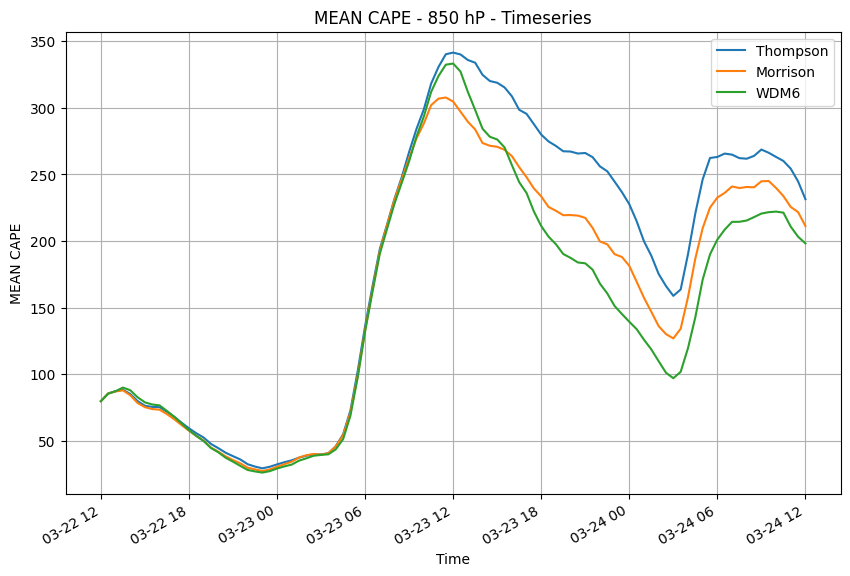

In [127]:

# Sum along lat and lon dimensions
MEAN_CAPE_THOMPSON_850 = CAPE_THOMPSON_850.mean(dim=('lat', 'lon', 'lev'))
MEAN_CAPE_MORRISON_850 = CAPE_MORRISON_850.mean(dim=('lat', 'lon', 'lev'))
MEAN_CAPE_WDM6_850 = CAPE_WDM6_850.mean(dim=('lat', 'lon', 'lev'))

# Convert time index to proper date format
MEAN_CAPE_THOMPSON_850['time'] = pd.to_datetime(MEAN_CAPE_THOMPSON_850.time.values)
MEAN_CAPE_MORRISON_850['time'] = pd.to_datetime(MEAN_CAPE_MORRISON_850.time.values)
MEAN_CAPE_WDM6_850['time'] = pd.to_datetime(MEAN_CAPE_WDM6_850.time.values)

# Plot timeseries
plt.figure(figsize=(10, 6))

MEAN_CAPE_THOMPSON_850.plot(x='time', label='Thompson')  
MEAN_CAPE_MORRISON_850.plot(x='time', label='Morrison')  
MEAN_CAPE_WDM6_850.plot(x='time', label='WDM6')  

plt.title('MEAN CAPE - 850 hP - Timeseries')
plt.xlabel('Time')
plt.ylabel('MEAN CAPE')
plt.legend()  # Show legend with model names
plt.grid(True)

plt.show()

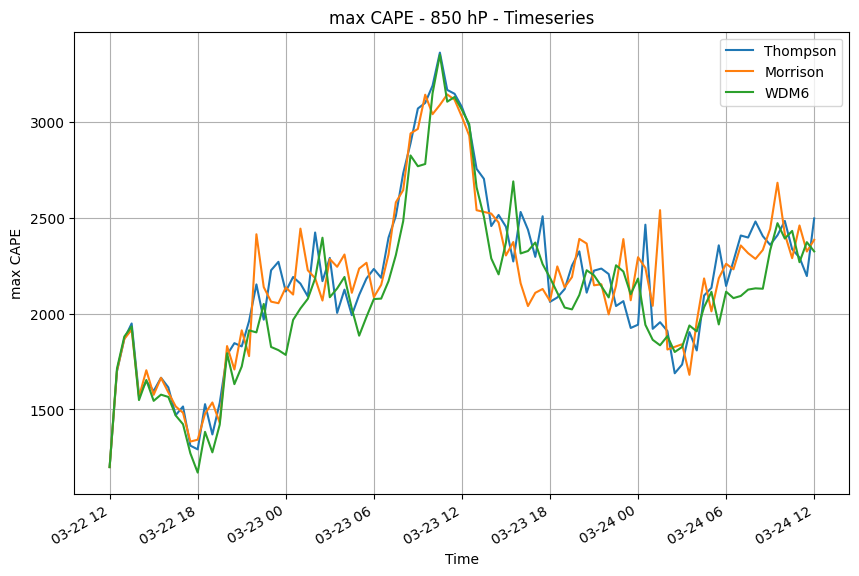

In [128]:
# Sum along lat and lon dimensions
max_CAPE_THOMPSON_850 = CAPE_THOMPSON_850.max(dim=('lat', 'lon', 'lev'))
max_CAPE_MORRISON_850 = CAPE_MORRISON_850.max(dim=('lat', 'lon', 'lev'))
max_CAPE_WDM6_850 = CAPE_WDM6_850.max(dim=('lat', 'lon', 'lev'))

# Convert time index to proper date format
max_CAPE_THOMPSON_850['time'] = pd.to_datetime(max_CAPE_THOMPSON_850.time.values)
max_CAPE_MORRISON_850['time'] = pd.to_datetime(max_CAPE_MORRISON_850.time.values)
max_CAPE_WDM6_850['time'] = pd.to_datetime(max_CAPE_WDM6_850.time.values)

# Plot timeseries
plt.figure(figsize=(10, 6))

max_CAPE_THOMPSON_850.plot(x='time', label='Thompson')  
max_CAPE_MORRISON_850.plot(x='time', label='Morrison')  
max_CAPE_WDM6_850.plot(x='time', label='WDM6')  

plt.title('max CAPE - 850 hP - Timeseries')
plt.xlabel('Time')
plt.ylabel('max CAPE')
plt.legend()  # Show legend with model names
plt.grid(True)

plt.show()

In [157]:
CAPE_THOMPSON = xr.open_dataset(r"/home/krish/Documents/rinu_files/DATASETS/WRF_MODEL_DATASETS/KERALA_23MARCH_2022_THOMPSON/CAPE_THOMPSON__KERALA_23MARCH2022.nc")
CAPE_MORRISON = xr.open_dataset(r"/home/krish/Documents/rinu_files/DATASETS/WRF_MODEL_DATASETS/KERALA_23MARCH_2022_MORRISON/CAPE_MORRISON_KERALA_23MARCH2022.nc")
CAPE_WDM6 = xr.open_dataset(r"/home/krish/Documents/rinu_files/DATASETS/WRF_MODEL_DATASETS/KERALA_23MARCH_2022_WDM6/CAPE_WDM6_KERALA_23MARCH2022.nc")

CAPE_THOMPSON

<xarray.Dataset>
Dimensions:  (lon: 204, lat: 204, lev: 19, time: 97)
Coordinates:
  * lon      (lon) float64 73.76 73.78 73.81 73.84 ... 79.24 79.27 79.3 79.33
  * lat      (lat) float64 7.995 8.022 8.049 8.076 ... 13.39 13.41 13.44 13.47
  * lev      (lev) float64 1e+03 950.0 900.0 850.0 ... 250.0 200.0 150.0 100.0
  * time     (time) datetime64[ns] 2022-03-22T12:00:00 ... 2022-03-24T12:00:00
Data variables:
    cc       (time, lev, lat, lon) float64 ...

In [158]:
CAPE_THOMPSON = CAPE_THOMPSON['cc']
CAPE_MORRISON = CAPE_MORRISON['cc']
CAPE_WDM6 = CAPE_WDM6['cc']

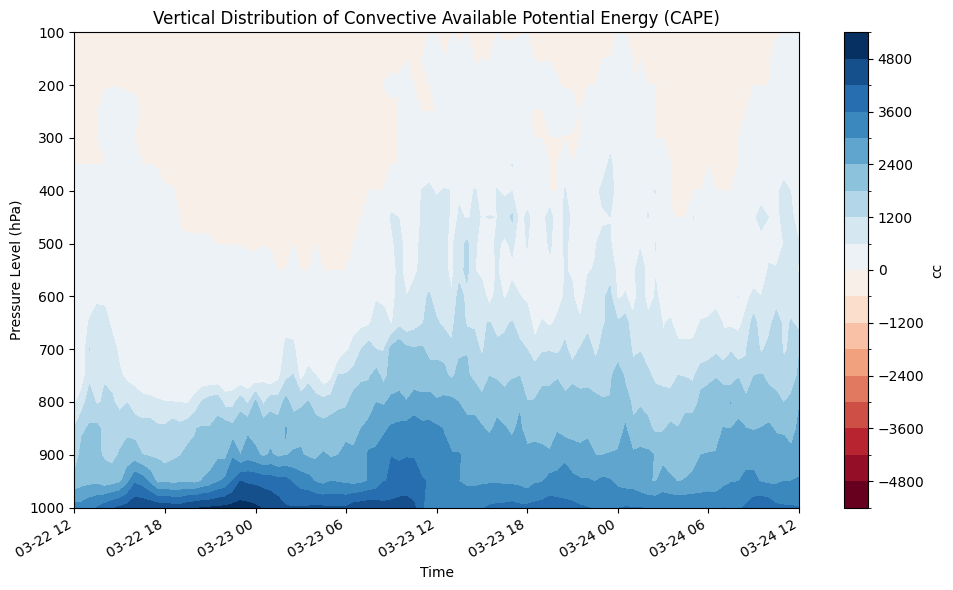

In [149]:


# Select the maximum value along lat and lon dimensions
max_CAPE_THOMPSON = CAPE_THOMPSON.max(dim=['lat', 'lon'])

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
max_CAPE_THOMPSON.plot.contourf(x='time', y='lev', ax=ax, levels=20, cmap='RdBu')
ax.invert_yaxis()  # Invert y-axis to have pressure levels increase upward
ax.set_title('Vertical Distribution of Convective Available Potential Energy (CAPE)')
ax.set_xlabel('Time')
ax.set_ylabel('Pressure Level (hPa)')
plt.tight_layout()
plt.show()


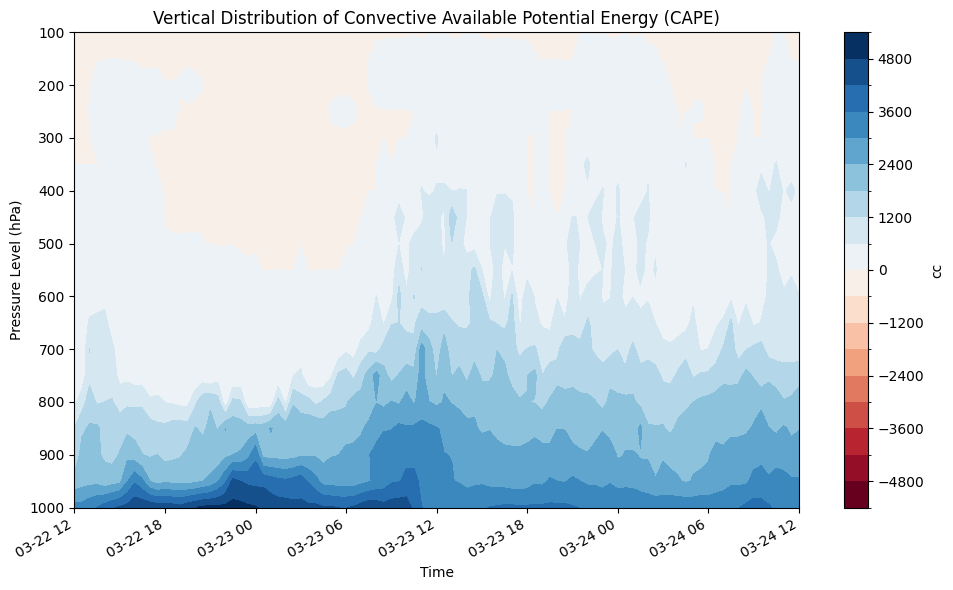

In [151]:
# Select the maximum value along lat and lon dimensions
max_CAPE_MORRISON = CAPE_MORRISON.max(dim=['lat', 'lon'])

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
max_CAPE_MORRISON.plot.contourf(x='time', y='lev', ax=ax, levels=20, cmap='RdBu')
ax.invert_yaxis()  # Invert y-axis to have pressure levels increase upward
ax.set_title('Vertical Distribution of Convective Available Potential Energy (CAPE)')
ax.set_xlabel('Time')
ax.set_ylabel('Pressure Level (hPa)')
plt.tight_layout()
plt.show()

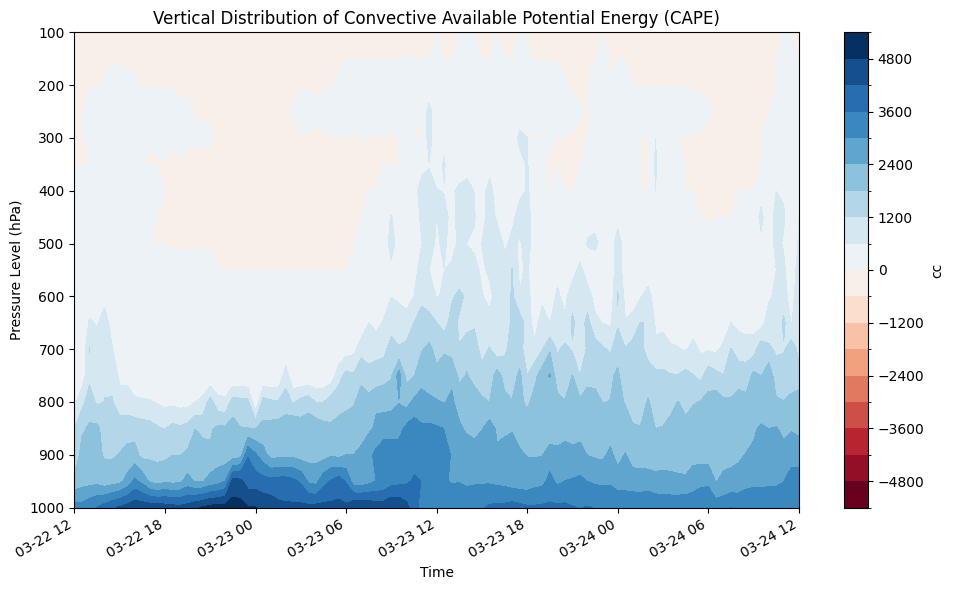

In [152]:
# Select the maximum value along lat and lon dimensions
max_CAPE_WDM6 = CAPE_WDM6.max(dim=['lat', 'lon'])

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
max_CAPE_WDM6.plot.contourf(x='time', y='lev', ax=ax, levels=20, cmap='RdBu')
ax.invert_yaxis()  # Invert y-axis to have pressure levels increase upward
ax.set_title('Vertical Distribution of Convective Available Potential Energy (CAPE)')
ax.set_xlabel('Time')
ax.set_ylabel('Pressure Level (hPa)')
plt.tight_layout()
plt.show()

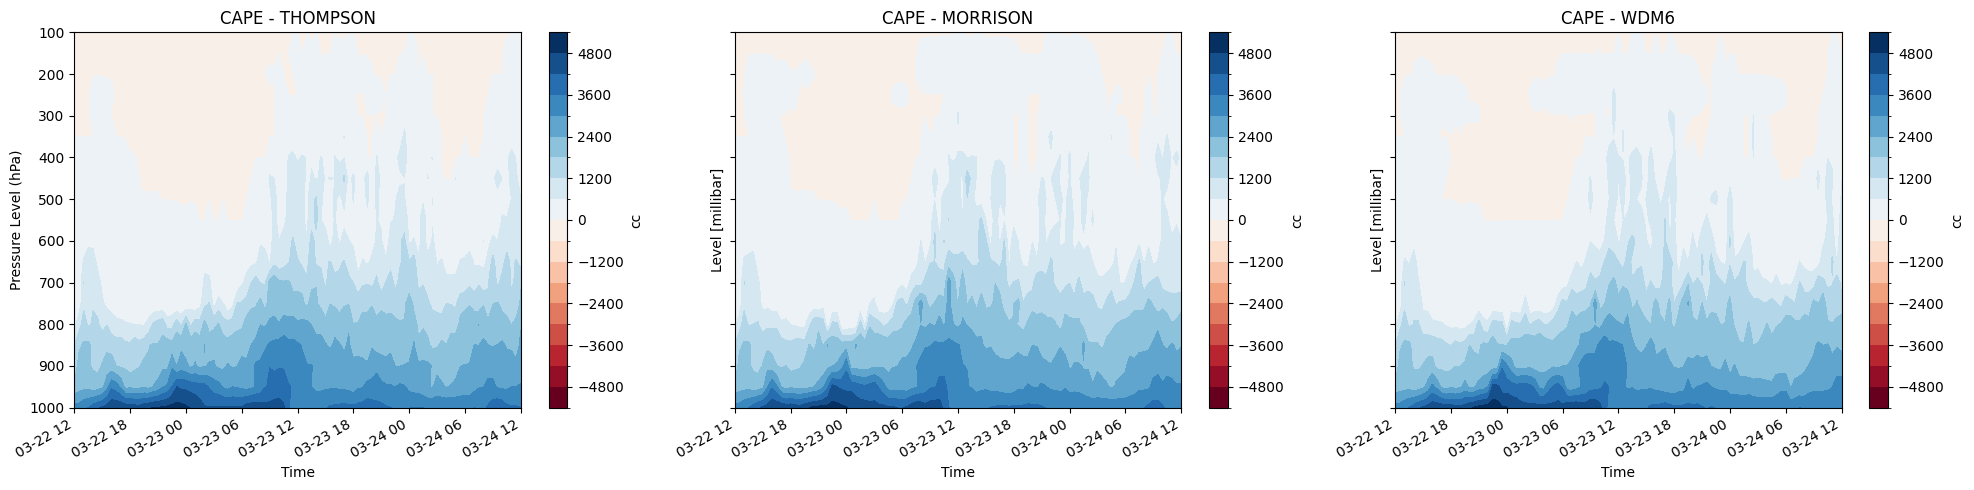

In [154]:
import xarray as xr
import matplotlib.pyplot as plt

# Assuming you have three datasets: CAPE_THOMPSON, CAPE_MORRISON, and CAPE_WDM6

# Create a list of datasets and corresponding titles
datasets = [CAPE_THOMPSON, CAPE_MORRISON, CAPE_WDM6]
titles = ['THOMPSON', 'MORRISON', 'WDM6']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharex=True, sharey=True)

# Loop through each dataset and plot
for i, (dataset, title) in enumerate(zip(datasets, titles)):
    # Select the maximum value along lat and lon dimensions
    max_CAPE = dataset.max(dim=['lat', 'lon'])

    # Plotting
    max_CAPE.plot.contourf(x='time', y='lev', ax=axes[i], levels=20, cmap='RdBu')
    axes[i].invert_yaxis()  # Invert y-axis to have pressure levels increase upward
    axes[i].set_title(f'CAPE - {title}')
    axes[i].set_xlabel('Time')
    if i == 0:
        axes[i].set_ylabel('Pressure Level (hPa)')

plt.tight_layout()
plt.show()


In [169]:
REL_HUM_THOMPSON = xr.open_dataset(r"/home/krish/Documents/rinu_files/DATASETS/WRF_MODEL_DATASETS/KERALA_23MARCH_2022_THOMPSON/REL_HUM_THOMPSON_23MARCH2022.nc")
REL_HUM_MORRISON = xr.open_dataset(r"/home/krish/Documents/rinu_files/DATASETS/WRF_MODEL_DATASETS/KERALA_23MARCH_2022_MORRISON/REL_HUM_MORRISON_KERALA_23MARCH2022.nc")
REL_HUM_WDM6 = xr.open_dataset(r"/home/krish/Documents/rinu_files/DATASETS/WRF_MODEL_DATASETS/KERALA_23MARCH_2022_WDM6/REL_HUM_WDM6_KERALA_23MARCH2022.nc")

REL_HUM_THOMPSON

<xarray.Dataset>
Dimensions:  (lon: 204, lat: 204, lev: 19, time: 97)
Coordinates:
  * lon      (lon) float64 73.76 73.78 73.81 73.84 ... 79.24 79.27 79.3 79.33
  * lat      (lat) float64 7.995 8.022 8.049 8.076 ... 13.39 13.41 13.44 13.47
  * lev      (lev) float64 1e+03 950.0 900.0 850.0 ... 250.0 200.0 150.0 100.0
  * time     (time) datetime64[ns] 2022-03-22T12:00:00 ... 2022-03-24T12:00:00
Data variables:
    rrr      (time, lev, lat, lon) float64 ...

In [172]:
REL_HUM_THOMPSON = REL_HUM_THOMPSON['rrr']
REL_HUM_MORRISON = REL_HUM_MORRISON['rhum']
REL_HUM_WDM6 = REL_HUM_WDM6['rhum']

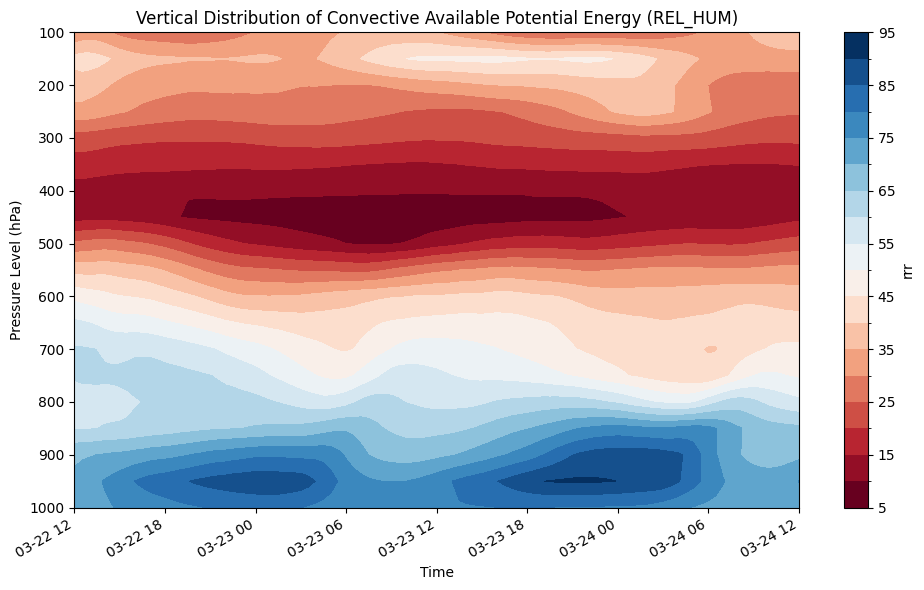

In [174]:
# Select the meanimum value along lat and lon dimensions
mean_REL_HUM_THOMPSON = REL_HUM_THOMPSON.mean(dim=['lat', 'lon'])

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
mean_REL_HUM_THOMPSON.plot.contourf(x='time', y='lev', ax=ax, levels=20, cmap='RdBu')
ax.invert_yaxis()  # Invert y-axis to have pressure levels increase upward
ax.set_title('Vertical Distribution of Convective Available Potential Energy (REL_HUM)')
ax.set_xlabel('Time')
ax.set_ylabel('Pressure Level (hPa)')
plt.tight_layout()
plt.show()

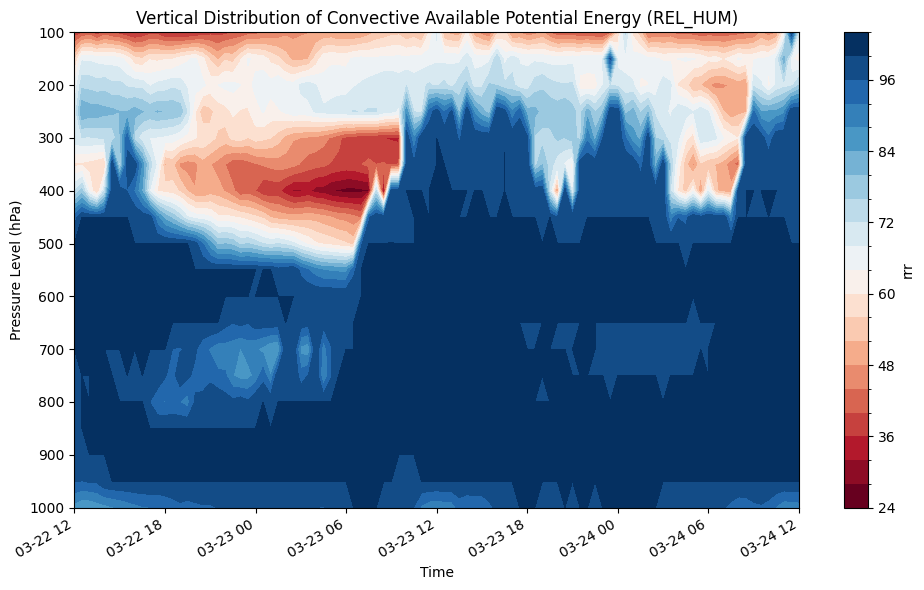

In [173]:

# Select the maximum value along lat and lon dimensions
max_REL_HUM_THOMPSON = REL_HUM_THOMPSON.max(dim=['lat', 'lon'])

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
max_REL_HUM_THOMPSON.plot.contourf(x='time', y='lev', ax=ax, levels=20, cmap='RdBu')
ax.invert_yaxis()  # Invert y-axis to have pressure levels increase upward
ax.set_title('Vertical Distribution of Convective Available Potential Energy (REL_HUM)')
ax.set_xlabel('Time')
ax.set_ylabel('Pressure Level (hPa)')
plt.tight_layout()
plt.show()


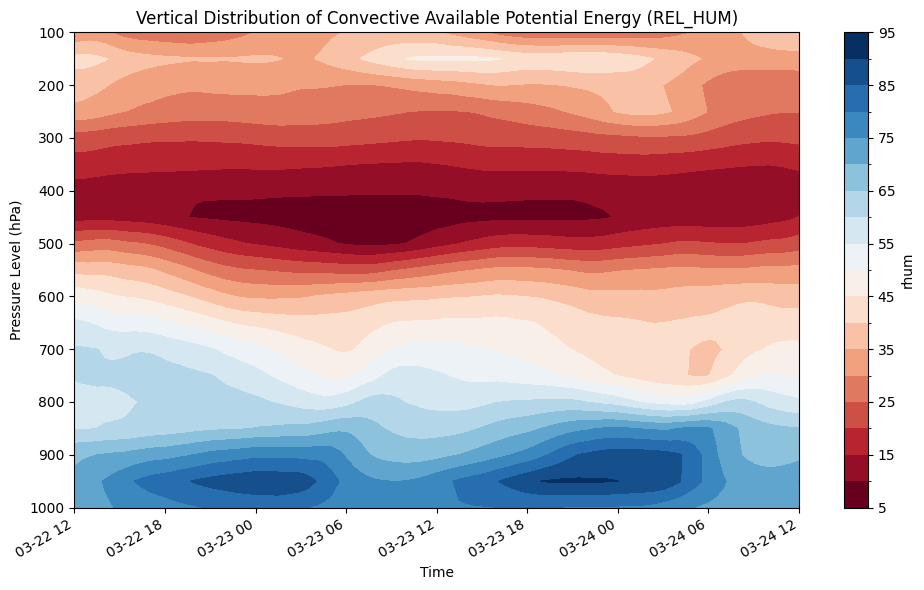

In [176]:
# Select the meanimum value along lat and lon dimensions
mean_REL_HUM_MORRISON = REL_HUM_MORRISON.mean(dim=['lat', 'lon'])

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
mean_REL_HUM_MORRISON.plot.contourf(x='time', y='lev', ax=ax, levels=20, cmap='RdBu')
ax.invert_yaxis()  # Invert y-axis to have pressure levels increase upward
ax.set_title('Vertical Distribution of Convective Available Potential Energy (REL_HUM)')
ax.set_xlabel('Time')
ax.set_ylabel('Pressure Level (hPa)')
plt.tight_layout()
plt.show()

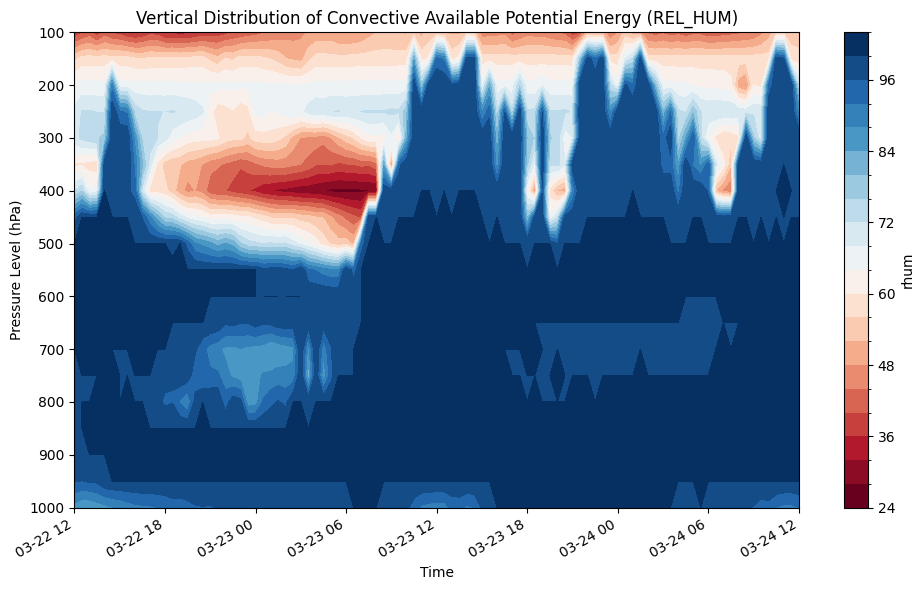

In [175]:
# Select the maximum value along lat and lon dimensions
max_REL_HUM_MORRISON = REL_HUM_MORRISON.max(dim=['lat', 'lon'])

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
max_REL_HUM_MORRISON.plot.contourf(x='time', y='lev', ax=ax, levels=20, cmap='RdBu')
ax.invert_yaxis()  # Invert y-axis to have pressure levels increase upward
ax.set_title('Vertical Distribution of Convective Available Potential Energy (REL_HUM)')
ax.set_xlabel('Time')
ax.set_ylabel('Pressure Level (hPa)')
plt.tight_layout()
plt.show()

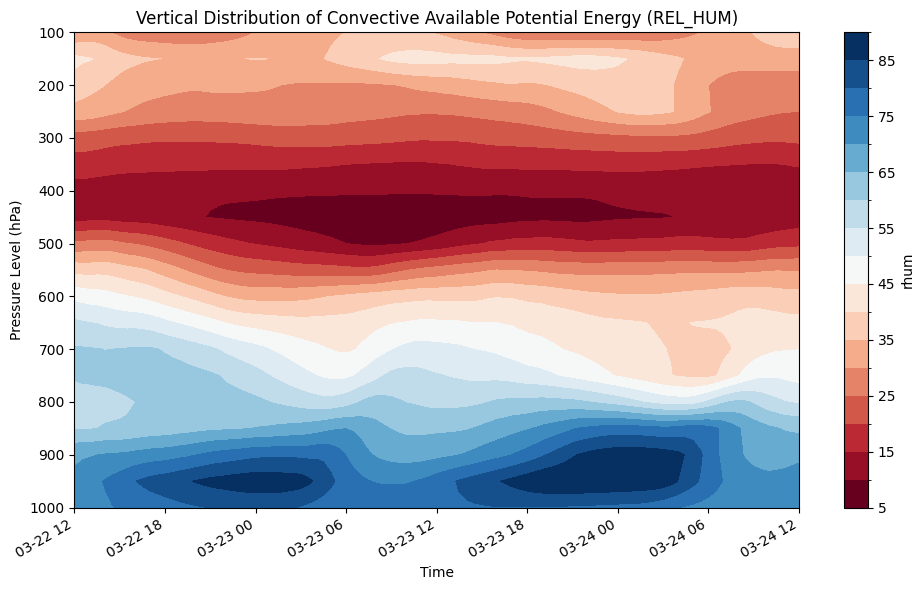

In [178]:
# Select the meanimum value along lat and lon dimensions
mean_REL_HUM_WDM6 = REL_HUM_WDM6.mean(dim=['lat', 'lon'])

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
mean_REL_HUM_WDM6.plot.contourf(x='time', y='lev', ax=ax, levels=20, cmap='RdBu')
ax.invert_yaxis()  # Invert y-axis to have pressure levels increase upward
ax.set_title('Vertical Distribution of Convective Available Potential Energy (REL_HUM)')
ax.set_xlabel('Time')
ax.set_ylabel('Pressure Level (hPa)')
plt.tight_layout()
plt.show()

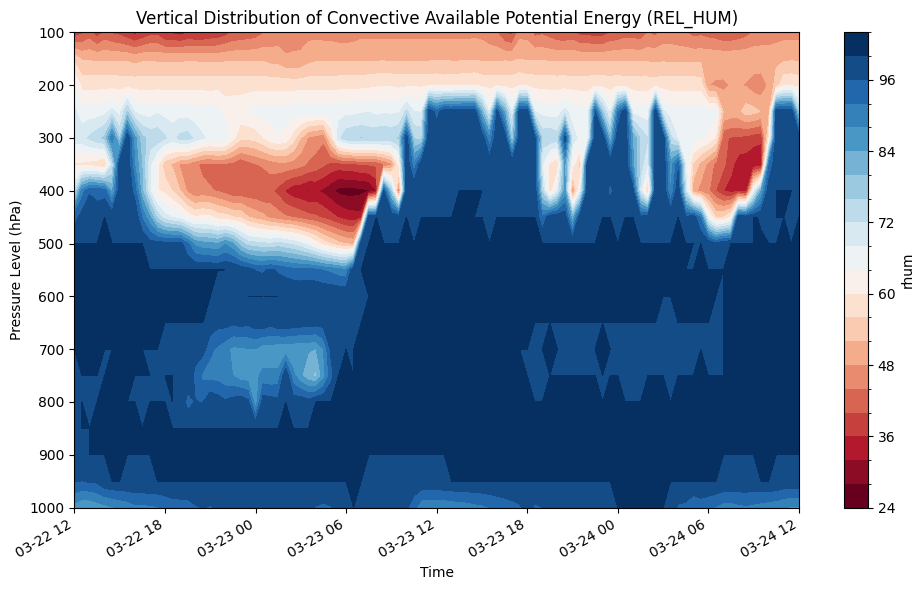

In [177]:
# Select the maximum value along lat and lon dimensions
max_REL_HUM_WDM6 = REL_HUM_WDM6.max(dim=['lat', 'lon'])

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
max_REL_HUM_WDM6.plot.contourf(x='time', y='lev', ax=ax, levels=20, cmap='RdBu')
ax.invert_yaxis()  # Invert y-axis to have pressure levels increase upward
ax.set_title('Vertical Distribution of Convective Available Potential Energy (REL_HUM)')
ax.set_xlabel('Time')
ax.set_ylabel('Pressure Level (hPa)')
plt.tight_layout()
plt.show()

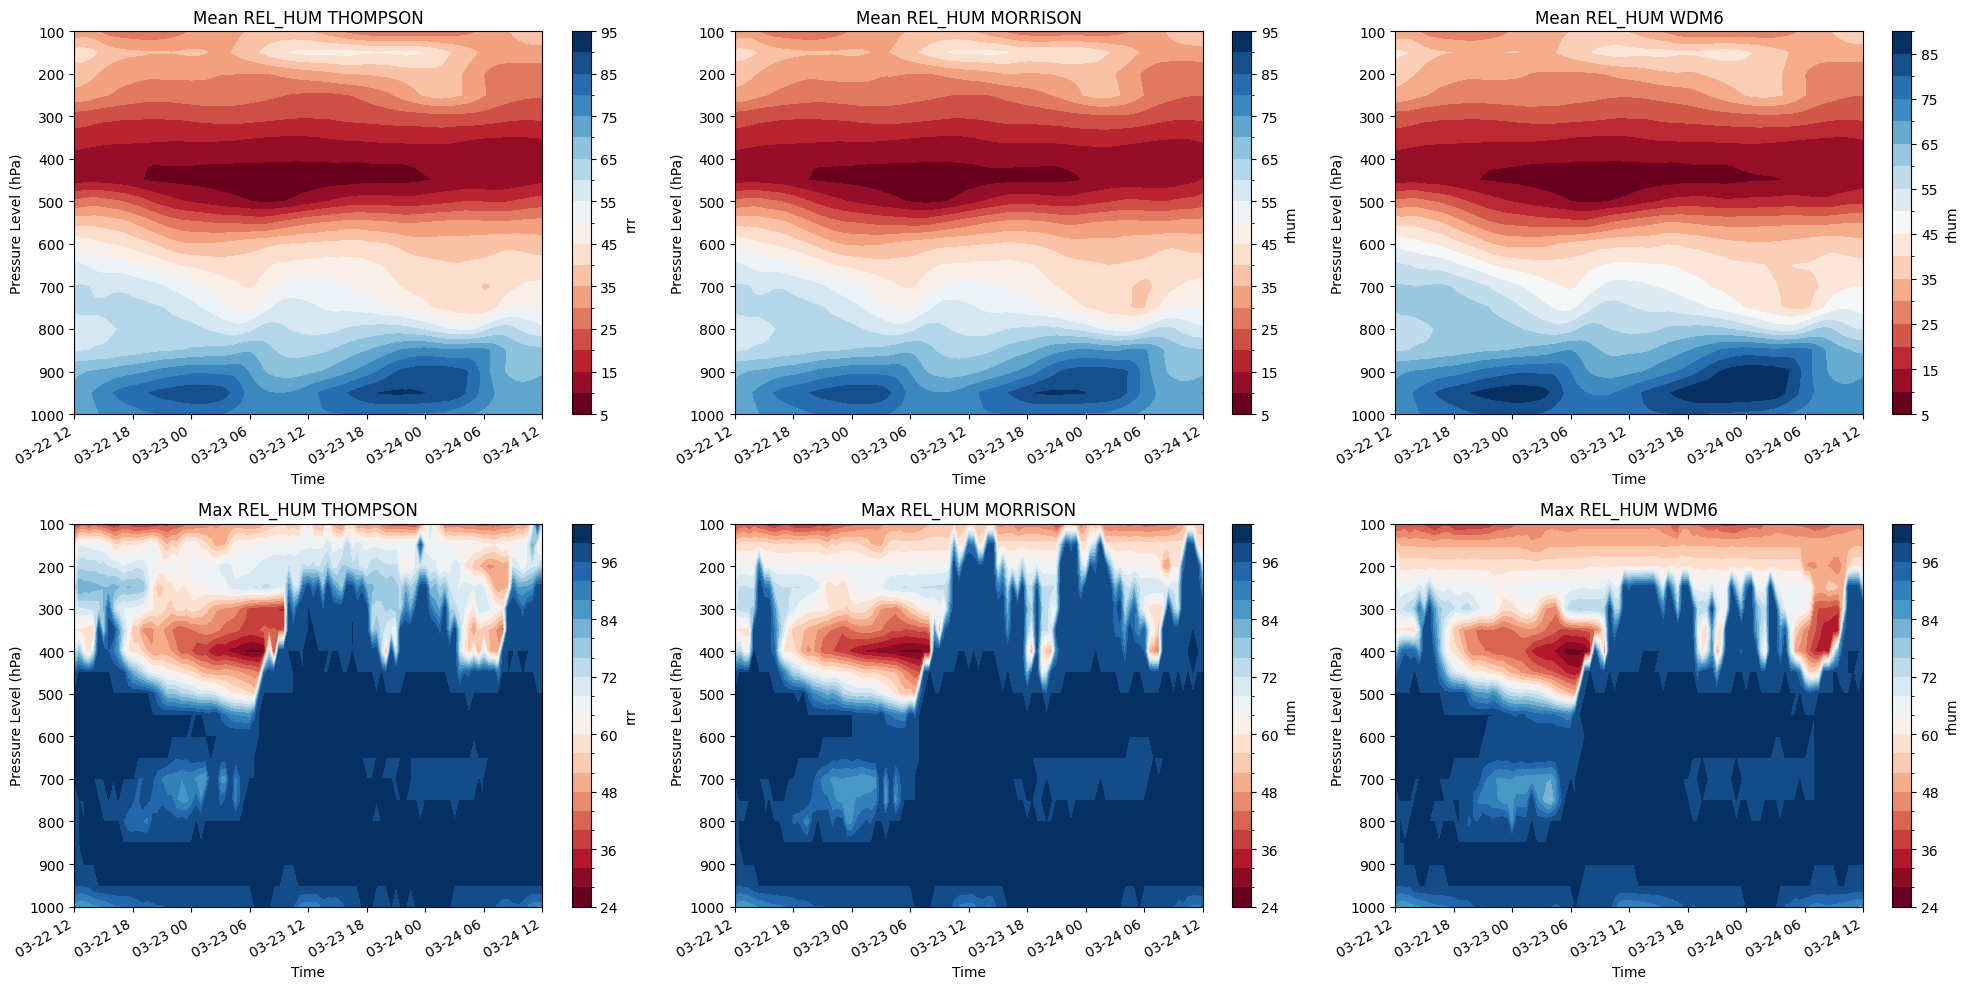

In [180]:
import matplotlib.pyplot as plt

# Create subplots with 2 rows and 3 columns
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

# Plot mean_REL_HUM_THOMPSON
mean_REL_HUM_THOMPSON.plot.contourf(x='time', y='lev', ax=axs[0, 0], levels=20, cmap='RdBu')
axs[0, 0].invert_yaxis()
axs[0, 0].set_title('Mean REL_HUM THOMPSON')
axs[0, 0].set_xlabel('Time')
axs[0, 0].set_ylabel('Pressure Level (hPa)')

# Plot mean_REL_HUM_MORRISON
mean_REL_HUM_MORRISON.plot.contourf(x='time', y='lev', ax=axs[0, 1], levels=20, cmap='RdBu')
axs[0, 1].invert_yaxis()
axs[0, 1].set_title('Mean REL_HUM MORRISON')
axs[0, 1].set_xlabel('Time')
axs[0, 1].set_ylabel('Pressure Level (hPa)')

# Plot mean_REL_HUM_WDM6
mean_REL_HUM_WDM6.plot.contourf(x='time', y='lev', ax=axs[0, 2], levels=20, cmap='RdBu')
axs[0, 2].invert_yaxis()
axs[0, 2].set_title('Mean REL_HUM WDM6')
axs[0, 2].set_xlabel('Time')
axs[0, 2].set_ylabel('Pressure Level (hPa)')

# Plot max_REL_HUM_THOMPSON
max_REL_HUM_THOMPSON.plot.contourf(x='time', y='lev', ax=axs[1, 0], levels=20, cmap='RdBu')
axs[1, 0].invert_yaxis()
axs[1, 0].set_title('Max REL_HUM THOMPSON')
axs[1, 0].set_xlabel('Time')
axs[1, 0].set_ylabel('Pressure Level (hPa)')

# Plot max_REL_HUM_MORRISON
max_REL_HUM_MORRISON.plot.contourf(x='time', y='lev', ax=axs[1, 1], levels=20, cmap='RdBu')
axs[1, 1].invert_yaxis()
axs[1, 1].set_title('Max REL_HUM MORRISON')
axs[1, 1].set_xlabel('Time')
axs[1, 1].set_ylabel('Pressure Level (hPa)')

# Plot max_REL_HUM_WDM6
max_REL_HUM_WDM6.plot.contourf(x='time', y='lev', ax=axs[1, 2], levels=20, cmap='RdBu')
axs[1, 2].invert_yaxis()
axs[1, 2].set_title('Max REL_HUM WDM6')
axs[1, 2].set_xlabel('Time')
axs[1, 2].set_ylabel('Pressure Level (hPa)')

plt.tight_layout()
plt.show()


In [181]:
TEMP_C_THOMPSON = xr.open_dataset(r"/home/krish/Documents/rinu_files/DATASETS/WRF_MODEL_DATASETS/KERALA_23MARCH_2022_THOMPSON/TEMP_C_THOMPSON_23MARCH2022.nc")
TEMP_C_MORRISON = xr.open_dataset(r"/home/krish/Documents/rinu_files/DATASETS/WRF_MODEL_DATASETS/KERALA_23MARCH_2022_MORRISON/TEMP_C_MORRISON_KERALA_23MARCH2022.nc")
TEMP_C_WDM6 = xr.open_dataset(r"/home/krish/Documents/rinu_files/DATASETS/WRF_MODEL_DATASETS/KERALA_23MARCH_2022_WDM6/TEMP_WDM6_KERALA_23MARCH2022.nc")

TEMP_C_THOMPSON

<xarray.Dataset>
Dimensions:  (lon: 204, lat: 204, lev: 19, time: 97)
Coordinates:
  * lon      (lon) float64 73.76 73.78 73.81 73.84 ... 79.24 79.27 79.3 79.33
  * lat      (lat) float64 7.995 8.022 8.049 8.076 ... 13.39 13.41 13.44 13.47
  * lev      (lev) float64 1e+03 950.0 900.0 850.0 ... 250.0 200.0 150.0 100.0
  * time     (time) datetime64[ns] 2022-03-22T12:00:00 ... 2022-03-24T12:00:00
Data variables:
    ttt      (time, lev, lat, lon) float64 ...

In [183]:
TEMP_C_THOMPSON = TEMP_C_THOMPSON['ttt']
TEMP_C_MORRISON = TEMP_C_MORRISON['temp']
TEMP_C_WDM6 = TEMP_C_WDM6['temp']

In [184]:
mean_TEMP_C_THOMPSON = TEMP_C_THOMPSON.mean(dim=['lat', 'lon'])
mean_TEMP_C_MORRISON = TEMP_C_MORRISON.mean(dim=['lat', 'lon'])
mean_TEMP_C_WDM6 = TEMP_C_WDM6.mean(dim=['lat', 'lon'])


In [185]:
max_TEMP_C_THOMPSON = TEMP_C_THOMPSON.max(dim=['lat', 'lon'])
max_TEMP_C_MORRISON = TEMP_C_MORRISON.max(dim=['lat', 'lon'])
max_TEMP_C_WDM6 = TEMP_C_WDM6.max(dim=['lat', 'lon'])

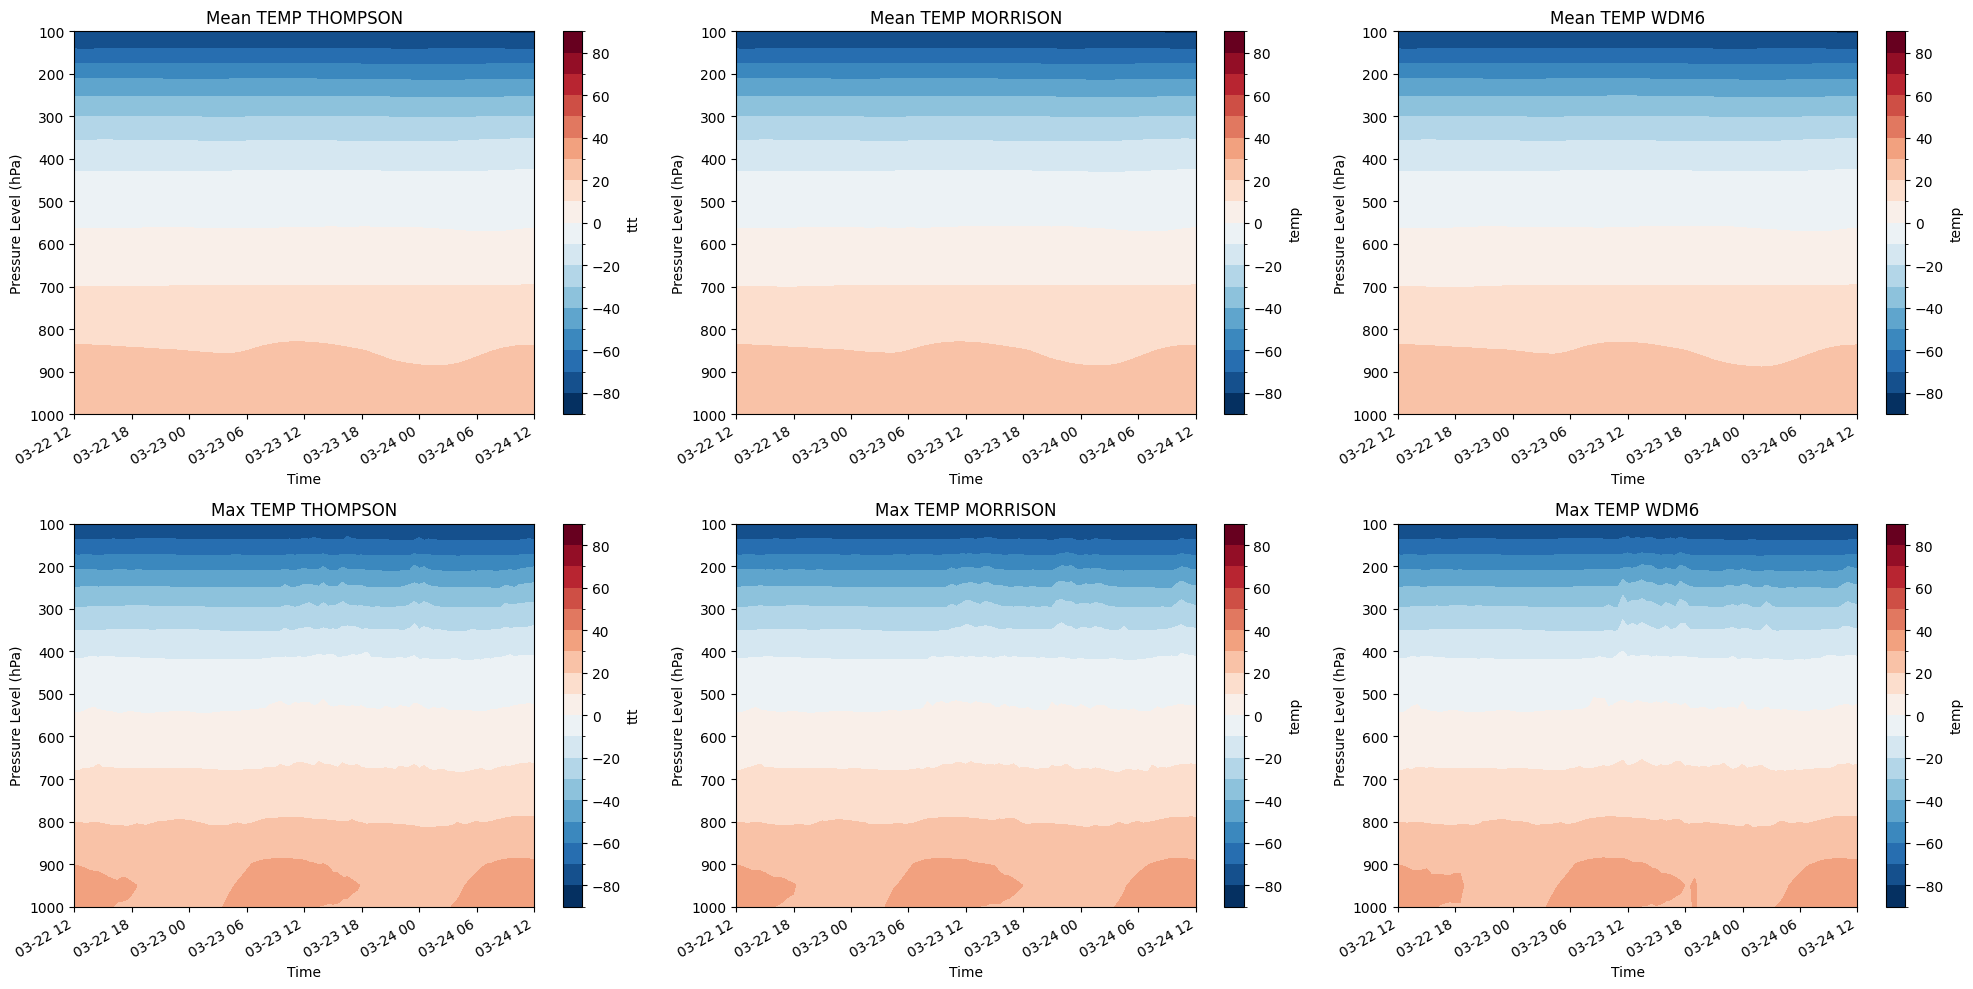

In [187]:
import matplotlib.pyplot as plt

# Create subplots with 2 rows and 3 columns
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

# Plot mean_TEMP_C_THOMPSON
mean_TEMP_C_THOMPSON.plot.contourf(x='time', y='lev', ax=axs[0, 0], levels=20, cmap='RdBu_r')
axs[0, 0].invert_yaxis()
axs[0, 0].set_title('Mean TEMP THOMPSON')
axs[0, 0].set_xlabel('Time')
axs[0, 0].set_ylabel('Pressure Level (hPa)')

# Plot mean_TEMP_C_MORRISON
mean_TEMP_C_MORRISON.plot.contourf(x='time', y='lev', ax=axs[0, 1], levels=20, cmap='RdBu_r')
axs[0, 1].invert_yaxis()
axs[0, 1].set_title('Mean TEMP MORRISON')
axs[0, 1].set_xlabel('Time')
axs[0, 1].set_ylabel('Pressure Level (hPa)')

# Plot mean_TEMP_C_WDM6
mean_TEMP_C_WDM6.plot.contourf(x='time', y='lev', ax=axs[0, 2], levels=20, cmap='RdBu_r')
axs[0, 2].invert_yaxis()
axs[0, 2].set_title('Mean TEMP WDM6')
axs[0, 2].set_xlabel('Time')
axs[0, 2].set_ylabel('Pressure Level (hPa)')

# Plot max_TEMP_C_THOMPSON
max_TEMP_C_THOMPSON.plot.contourf(x='time', y='lev', ax=axs[1, 0], levels=20, cmap='RdBu_r')
axs[1, 0].invert_yaxis()
axs[1, 0].set_title('Max TEMP THOMPSON')
axs[1, 0].set_xlabel('Time')
axs[1, 0].set_ylabel('Pressure Level (hPa)')

# Plot max_TEMP_C_MORRISON
max_TEMP_C_MORRISON.plot.contourf(x='time', y='lev', ax=axs[1, 1], levels=20, cmap='RdBu_r')
axs[1, 1].invert_yaxis()
axs[1, 1].set_title('Max TEMP MORRISON')
axs[1, 1].set_xlabel('Time')
axs[1, 1].set_ylabel('Pressure Level (hPa)')

# Plot max_TEMP_C_WDM6
max_TEMP_C_WDM6.plot.contourf(x='time', y='lev', ax=axs[1, 2], levels=20, cmap='RdBu_r')
axs[1, 2].invert_yaxis()
axs[1, 2].set_title('Max TEMP WDM6')
axs[1, 2].set_xlabel('Time')
axs[1, 2].set_ylabel('Pressure Level (hPa)')

plt.tight_layout()
plt.show()
